# Project 2 - Ames Housing Data and Kaggle Challenge

Welcome to Project 2! It's time to start modeling.

**Primary Learning Objectives:**
1. Creating and iteratively refining a regression model
2. Using [Kaggle](https://www.kaggle.com/) to practice the modeling process
3. Providing business insights through reporting and presentation.

You are tasked with creating a regression model based on the Ames Housing Dataset. This model will predict the price of a house at sale.

The Ames Housing Dataset is an exceptionally detailed and robust dataset with over 70 columns of different features relating to houses.

Secondly, we are hosting a competition on Kaggle to give you the opportunity to practice the following skills:

- Refining models over time
- Use of train-test split, cross-validation, and data with unknown values for the target to simulate the modeling process
- The use of Kaggle as a place to practice data science

As always, you will be submitting a technical report and a presentation. **You may find that the best model for Kaggle is not the best model to address your data science problem.**

### Problem Statement

Many property owners often rely on their agents to advise them on the selling price of their property. Sometimes, these advise may not be in the favour of the property owners. Agents may rush sellers into closing a deal at a lower price so that they can earn commissions quickly at the expense of their clients. On the flipside, agents may also upsell properties to earn higher commissions.

Ames Property Group, a brokerage agency for residential properties in Ames, Iowa aims to help buyers and sellers buy or sell their properties at the right price. This will help to ensure that our customers do not overpay for a property, or sell a property below their market value, so that customers will put their trust in us to broker the transaction. 

As a data analyst within the agency, I am tasked to create a property price prediction calculator that uses past sales data and characteristics of the properties sold to predict the market value of a property based on inputs of selected property features. The calculator should be able to provide a predicted price with low RMSE and low Coefficent of Variance (CV) of less than 20%. The model will be proposed to the senior management team of agency for approval. 

In [1]:
#import packages and formatting
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import shap
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV, ElasticNet
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
plt.style.use('fast')

pd.set_option("display.max_rows", None, "display.max_columns", None)

### Import Data

In [2]:
#import dataset
ames_df = pd.read_csv('./datasets/train.csv')
ames_df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [3]:
#lower caps for column headers
ames_df.columns = ames_df.columns.str.lower()
#columns of dataset
ames_df.columns[:]

Index(['id', 'pid', 'ms subclass', 'ms zoning', 'lot frontage', 'lot area',
       'street', 'alley', 'lot shape', 'land contour', 'utilities',
       'lot config', 'land slope', 'neighborhood', 'condition 1',
       'condition 2', 'bldg type', 'house style', 'overall qual',
       'overall cond', 'year built', 'year remod/add', 'roof style',
       'roof matl', 'exterior 1st', 'exterior 2nd', 'mas vnr type',
       'mas vnr area', 'exter qual', 'exter cond', 'foundation', 'bsmt qual',
       'bsmt cond', 'bsmt exposure', 'bsmtfin type 1', 'bsmtfin sf 1',
       'bsmtfin type 2', 'bsmtfin sf 2', 'bsmt unf sf', 'total bsmt sf',
       'heating', 'heating qc', 'central air', 'electrical', '1st flr sf',
       '2nd flr sf', 'low qual fin sf', 'gr liv area', 'bsmt full bath',
       'bsmt half bath', 'full bath', 'half bath', 'bedroom abvgr',
       'kitchen abvgr', 'kitchen qual', 'totrms abvgrd', 'functional',
       'fireplaces', 'fireplace qu', 'garage type', 'garage yr blt',
       'g

In [4]:
ames_df.shape

(2051, 81)

### Data Cleaning

In [5]:
#view inputs of 
ames_df.groupby("ms zoning").describe()

id                                                              \
            count         mean          std     min      25%     50%      75%   
ms zoning                                                                       
A (agr)       2.0  2229.000000   954.594155  1554.0  1891.50  2229.0  2566.50   
C (all)      19.0  1657.157895  1043.841317   305.0   727.50  1556.0  2774.50   
FV          101.0  1258.574257   781.136382    23.0   527.00  1170.0  1841.00   
I (all)       1.0   946.000000          NaN   946.0   946.00   946.0   946.00   
RH           14.0  1730.642857   938.278506    29.0   940.00  1935.0  2454.00   
RL         1598.0  1466.582603   840.507056     1.0   770.25  1492.5  2186.75   
RM          316.0  1555.091772   853.007208    30.0   754.75  1419.5  2245.75   

                      pid                                           \
              max   count          mean           std          min   
ms zoning                                                            
A (agr)    2904.0     2.0  9.166880e+08  9.103279e+06  910251050.0   
C (all)    2883.0    19.0  9.097814e+08  3.252881e+06  902456015.0   
FV         2513.0   101.0  5.309473e+08  2.443037e+06  527364030.0   
I (all)     946.0     1.0  9.122511e+08           NaN  912251110.0   
RH         2849.0    14.0  7.456685e+08  1.949324e+08  527427110.0   
RL         2930.0  1598.0  6.897249e+08  1.867052e+08  526301100.0   
RM         2920.0   316.0  8.775197e+08  1.005725e+08  527450010.0   

                                                               ms subclass  \
                   25%          50%           75%          max       count   
ms zoning                                                                    
A (agr)    913469545.0  916688040.0  9.199065e+08  923125030.0         2.0   
C (all)    911102610.0  911128020.0  9.111754e+08  911225110.0        19.0   
FV         528477080.0  533206040.0  5.332131e+08  534104100.0       101.0   
I (all)    912251110.0  912251110.0  9.122511e+08  912251110.0         1.0   
RH         528439677.5  905790720.0  9.091648e+08  909275030.0        14.0   
RL         528292062.5  535315220.0  9.071801e+08  924152030.0      1598.0   
RM         902206250.0  903229570.0  9.075178e+08  923228420.0       316.0   

                                                                   \
                 mean        std   min   25%    50%    75%    max   
ms zoning                                                           
A (agr)     20.000000   0.000000  20.0  20.0   20.0   20.0   20.0   
C (all)     55.789474  49.700860  20.0  30.0   50.0   50.0  190.0   
FV          88.712871  55.743401  20.0  60.0   60.0  160.0  160.0   
I (all)     30.000000        NaN  30.0  30.0   30.0   30.0   30.0   
RH         109.285714  59.156154  20.0  70.0  120.0  150.0  190.0   
RL          49.671464  35.983390  20.0  20.0   50.0   60.0  190.0   
RM          82.056962  52.356015  20.0  50.0   70.0  120.0  190.0   

          lot frontage                                                       \
                 count        mean        std    min     25%    50%     75%   
ms zoning                                                                     
A (agr)            2.0  102.500000  31.819805   80.0   91.25  102.5  113.75   
C (all)           19.0   64.052632  12.029933   50.0   60.00   60.0   66.00   
FV                88.0   59.363636  25.222314   24.0   34.00   65.0   81.00   
I (all)            1.0  109.000000        NaN  109.0  109.00  109.0  109.00   
RH                11.0   48.727273  18.221366   26.0   30.00   55.0   59.00   
RL              1309.0   73.385027  22.109298   22.0   60.00   70.0   82.00   
RM               291.0   53.237113  19.869110   21.0   44.00   52.0   60.00   

                 lot area                                                 \
             max    count          mean           std      min       25%   
ms zoning                                                                  
A (agr)    1

In [6]:
#drop industrial, agricultural and commercial for ms zoning to keep only residential data
non_resi = ames_df[(ames_df['ms zoning'] == "A (agr)") | (ames_df['ms zoning'] == "I (all)") | (ames_df['ms zoning'] == "C (all)")].index
ames_df.drop(non_resi, inplace=True)
ames_df.shape

(2029, 81)

In [7]:
ames_df.isnull().sum()

id                    0
pid                   0
ms subclass           0
ms zoning             0
lot frontage        330
lot area              0
street                0
alley              1892
lot shape             0
land contour          0
utilities             0
lot config            0
land slope            0
neighborhood          0
condition 1           0
condition 2           0
bldg type             0
house style           0
overall qual          0
overall cond          0
year built            0
year remod/add        0
roof style            0
roof matl             0
exterior 1st          0
exterior 2nd          0
mas vnr type         22
mas vnr area         22
exter qual            0
exter cond            0
foundation            0
bsmt qual            51
bsmt cond            51
bsmt exposure        54
bsmtfin type 1       51
bsmtfin sf 1          1
bsmtfin type 2       52
bsmtfin sf 2          1
bsmt unf sf           1
total bsmt sf         1
heating               0
heating qc      

Variables with more than 1000 null values will be excluded from the analysis.

In [8]:
#to clean up continuous variables that may be used for the model

#convert 22 null values to 0 as the mas vnr type is empty --> assume type to be None, and area to be 0.
ames_df['mas vnr area v2'] = ames_df['mas vnr area'].fillna(0)

#convert 1 null value for total bsmt sf from NaN to 0 --> assume no basement since bsmt type is also null
ames_df['total bsmt sf v2'] = ames_df['total bsmt sf'].fillna(0)

#convert 1 null value for garage area to mean of all garage sizes --> property has a garage and the type is detached
mean=ames_df['garage area'].mean()
ames_df['garage area v2'] = ames_df['garage area'].fillna(mean)

In [9]:
#to map 'utilities' into scale of 1 - 4 (in ascending order of utilities available)
ames_df['utilities_scale'] = ames_df['utilities'].map({'AllPub':4, 'NoSewr':3, 'NoSeWa':2, 'ELO':1})
ames_df[['utilities_scale']].describe()

,utilities_scale
count,2029.000000
mean,3.999014
std,0.044401
min,2.000000
25%,4.000000
50%,4.000000
75%,4.000000
max,4.000000


**Notes**
1. After dropping Agriculture, Industrial and Commercial zone data, the number of data was reduced from 2051 to 2029.
2. Null values were replaced based on the assumptions as written in the comments.
3. Accessibility to utilities may be an important factor that affects the price of the property. However, 'utilities_scale' is highly skewed as majority of the properties have all public utilities. Due to the low variance, this variable will be excluded from model construction. 

### Data Visualisation

Broad/generic features that are usually assessed when buying a property will be assessed by the distribution and the trend with the outcome variable using visualisation methods before deciding if they should be included in the base model.

In [12]:
#total floor area excluding basement (summation of 1st and 2nd flr sf): 'gr liv area'
ames_df.loc[:, ['gr liv area', '1st flr sf', '2nd flr sf']].head()

,gr liv area,1st flr sf,2nd flr sf
0,1479,725,754
1,2122,913,1209
2,1057,1057,0
3,1444,744,700
4,1445,831,614


In [13]:
#total basement area (summation of type1, type 2, and unfinished): 'total bsmt sf v2'
ames_df.loc[:, ['total bsmt sf v2', 'bsmtfin sf 1', 'bsmtfin sf 2', 'bsmt unf sf']].head()

,total bsmt sf v2,bsmtfin sf 1,bsmtfin sf 2,bsmt unf sf
0,725.0,533.0,0.0,192.0
1,913.0,637.0,0.0,276.0
2,1057.0,731.0,0.0,326.0
3,384.0,0.0,0.0,384.0
4,676.0,0.0,0.0,676.0


'1st flr sf' and '2nd flr sf' will be excluded since they are already represented in 'gr liv area'. The same concept applies to 'total bsmt sf v2'.

The size of the property is usually one of the important metrics that would determine the property price. The following variables related to the size will be included:
- Size of the lot (lot area)
- Total floor area (gr liv area)
- Total basement area (total bsmt sf v2)
- Size of garage (garage area v2)

##### Boxplot to Identify Variables with Outliers

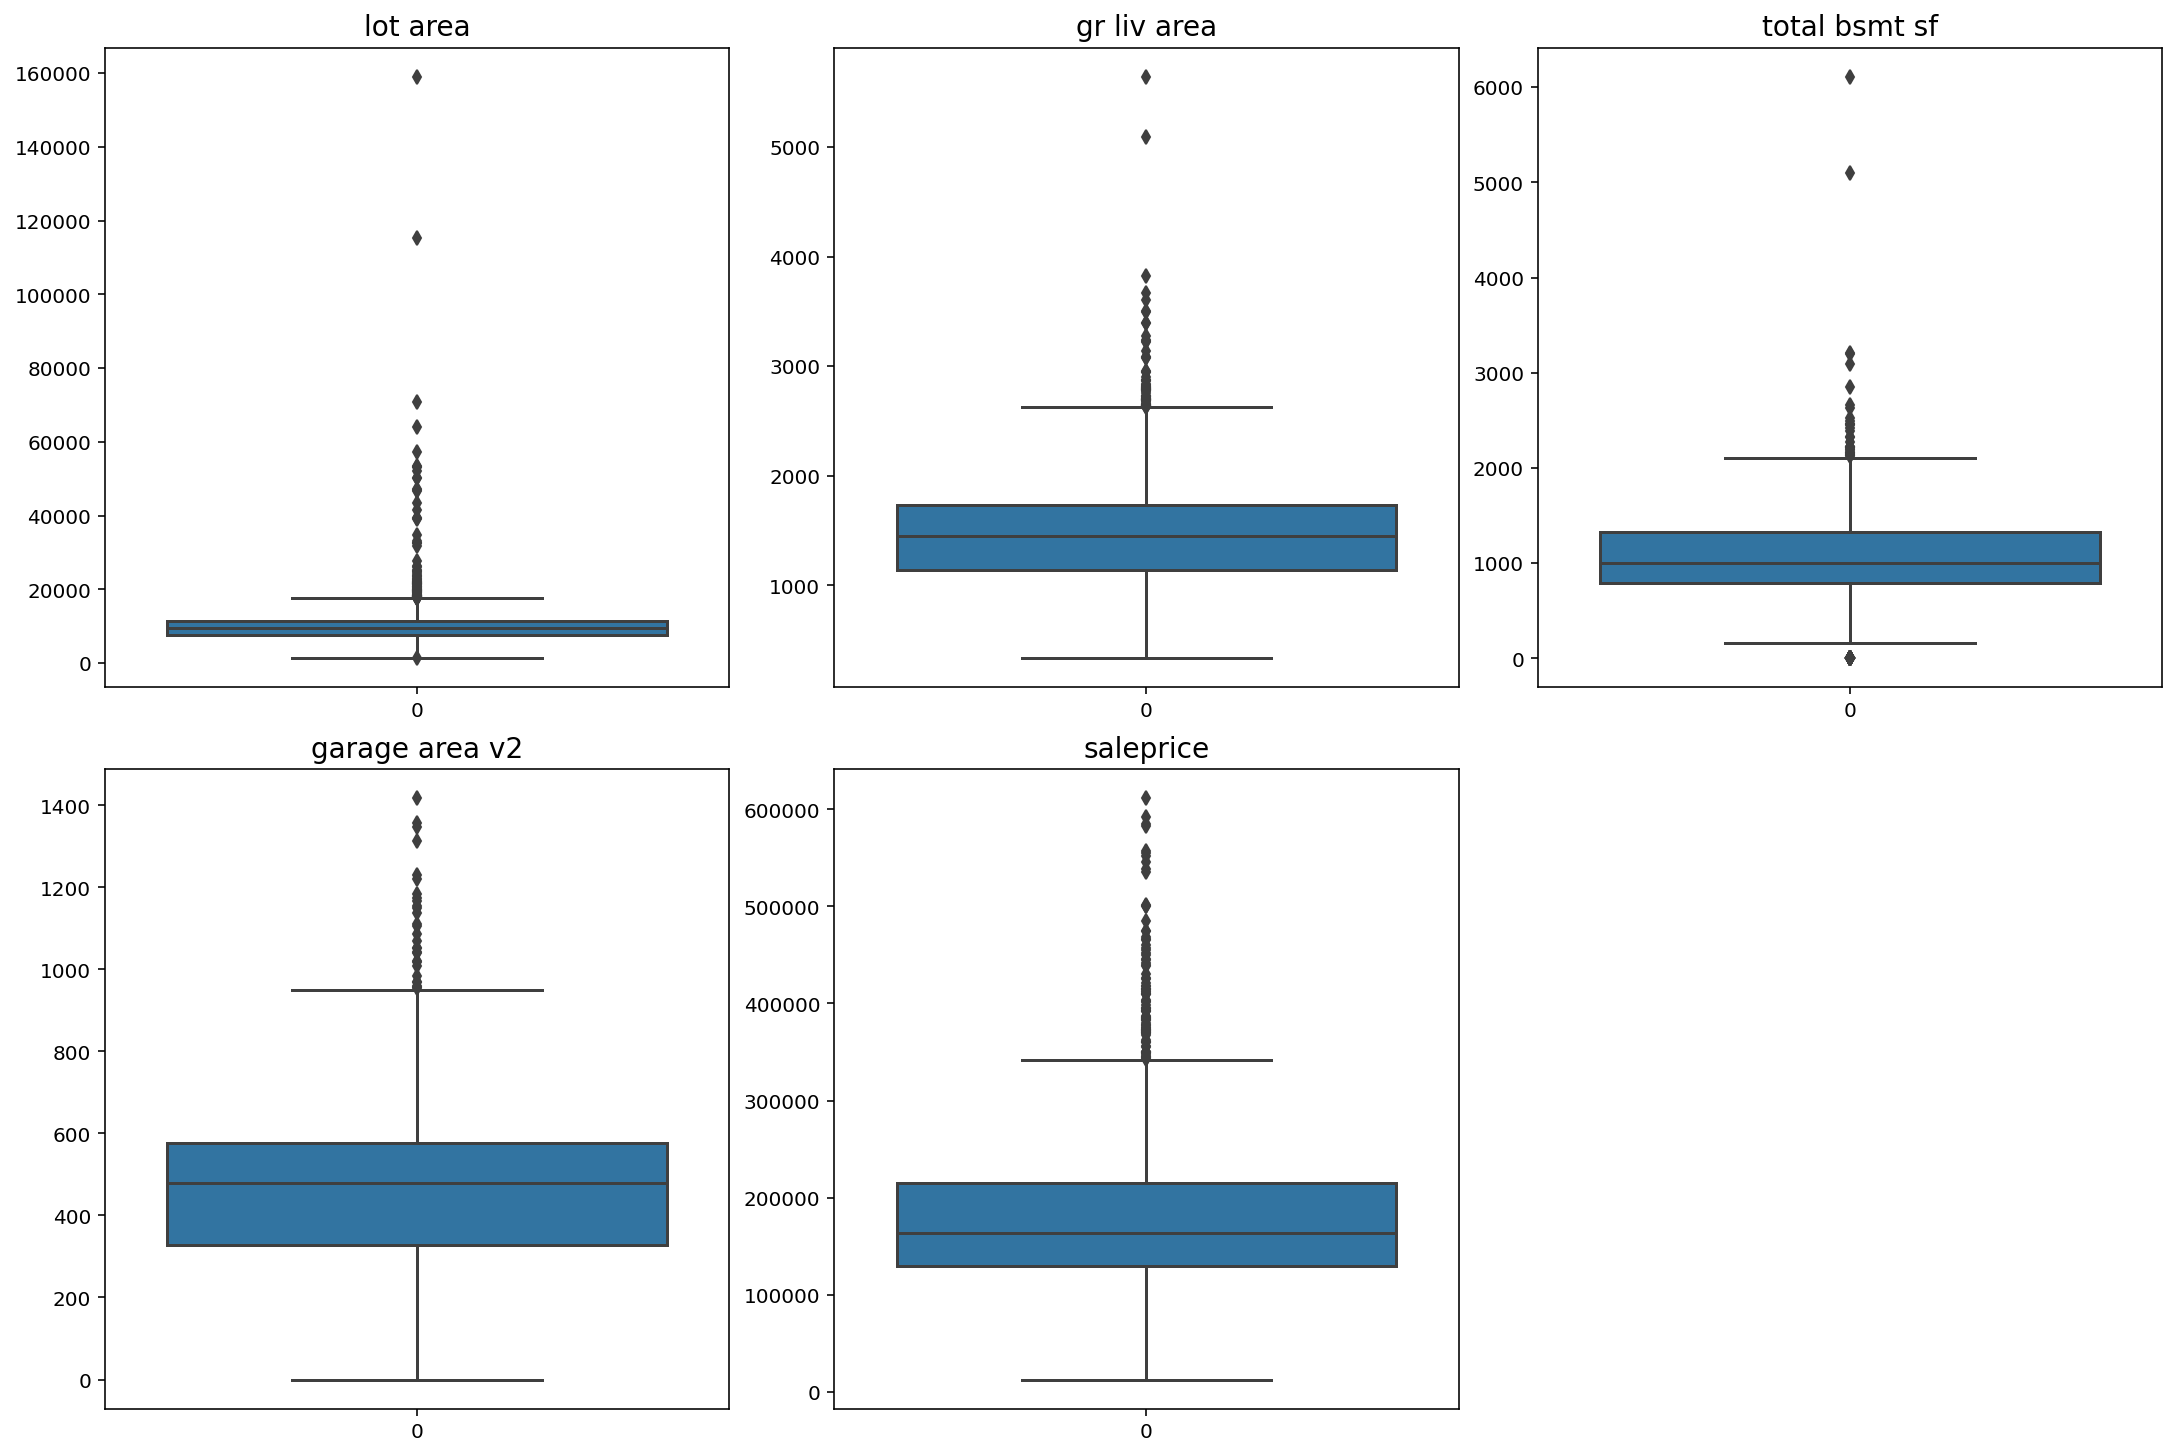

In [14]:
#plot boxplots of the continuous variables that may be the best predictors of the target variable
#to identify variables with outliers

fig, axes = plt.subplots(2, 3, figsize=(15,10), sharey=False, layout="constrained")
sns.boxplot(data=ames_df["lot area"], orient="v", ax=axes[0,0]).axes.set_title("lot area", fontsize=14)
sns.boxplot(data=ames_df["gr liv area"], orient="v", ax=axes[0,1]).axes.set_title("gr liv area", fontsize=14)
sns.boxplot(data=ames_df["total bsmt sf"], orient="v", ax=axes[0,2]).axes.set_title("total bsmt sf", fontsize=14)
sns.boxplot(data=ames_df["garage area v2"], orient="v", ax=axes[1,0]).axes.set_title("garage area v2", fontsize=14)
sns.boxplot(data=ames_df["saleprice"], orient="v", ax=axes[1,1]).axes.set_title("saleprice", fontsize=14)
axes[1,2].set_axis_off()

In [15]:
#extracting the outliers within the 5 variables to be dropped

saleprice_out = ames_df[(ames_df.saleprice > np.mean(ames_df.saleprice) + 3*np.std(ames_df.saleprice))]
ames_df.drop(saleprice_out.index, inplace=True)
grlivarea_out = ames_df[(ames_df['gr liv area'] > np.mean(ames_df['gr liv area']) + 3*np.std(ames_df['gr liv area']))]
ames_df.drop(grlivarea_out.index, inplace=True)
totalbsmt_out = ames_df[(ames_df['total bsmt sf'] > np.mean(ames_df['total bsmt sf']) + 3*np.std(ames_df['total bsmt sf']))]
ames_df.drop(totalbsmt_out.index, inplace=True)
lotarea_out = ames_df[(ames_df['lot area'] > np.mean(ames_df['lot area']) + 3*np.std(ames_df['lot area']))]
ames_df.drop(lotarea_out.index, inplace=True)
garage_out = ames_df[(ames_df['garage area v2'] > np.mean(ames_df['garage area v2']) + 3*np.std(ames_df['garage area v2']))]
ames_df.drop(garage_out.index, inplace=True)
ames_df.shape

(1952, 85)

In [16]:
ames_df[['saleprice']].describe().round(2)

,saleprice
count,1952.00
mean,175490.82
std,66365.15
min,12789.00
25%,129500.00
50%,160000.00
75%,209000.00
max,418000.00


Based on the boxplot of the variables, the outliers are mainly above the upperbound values. Values that are more than 3 standard deviation of each of the 4 variables will be classified as outliers. In total, 77 outliers were removed from the dataset as these are anomalies that could skew the model. The outliers account for only 3.8% of the sample.

##### Histograms to Examine Distribution of Continuous Variables

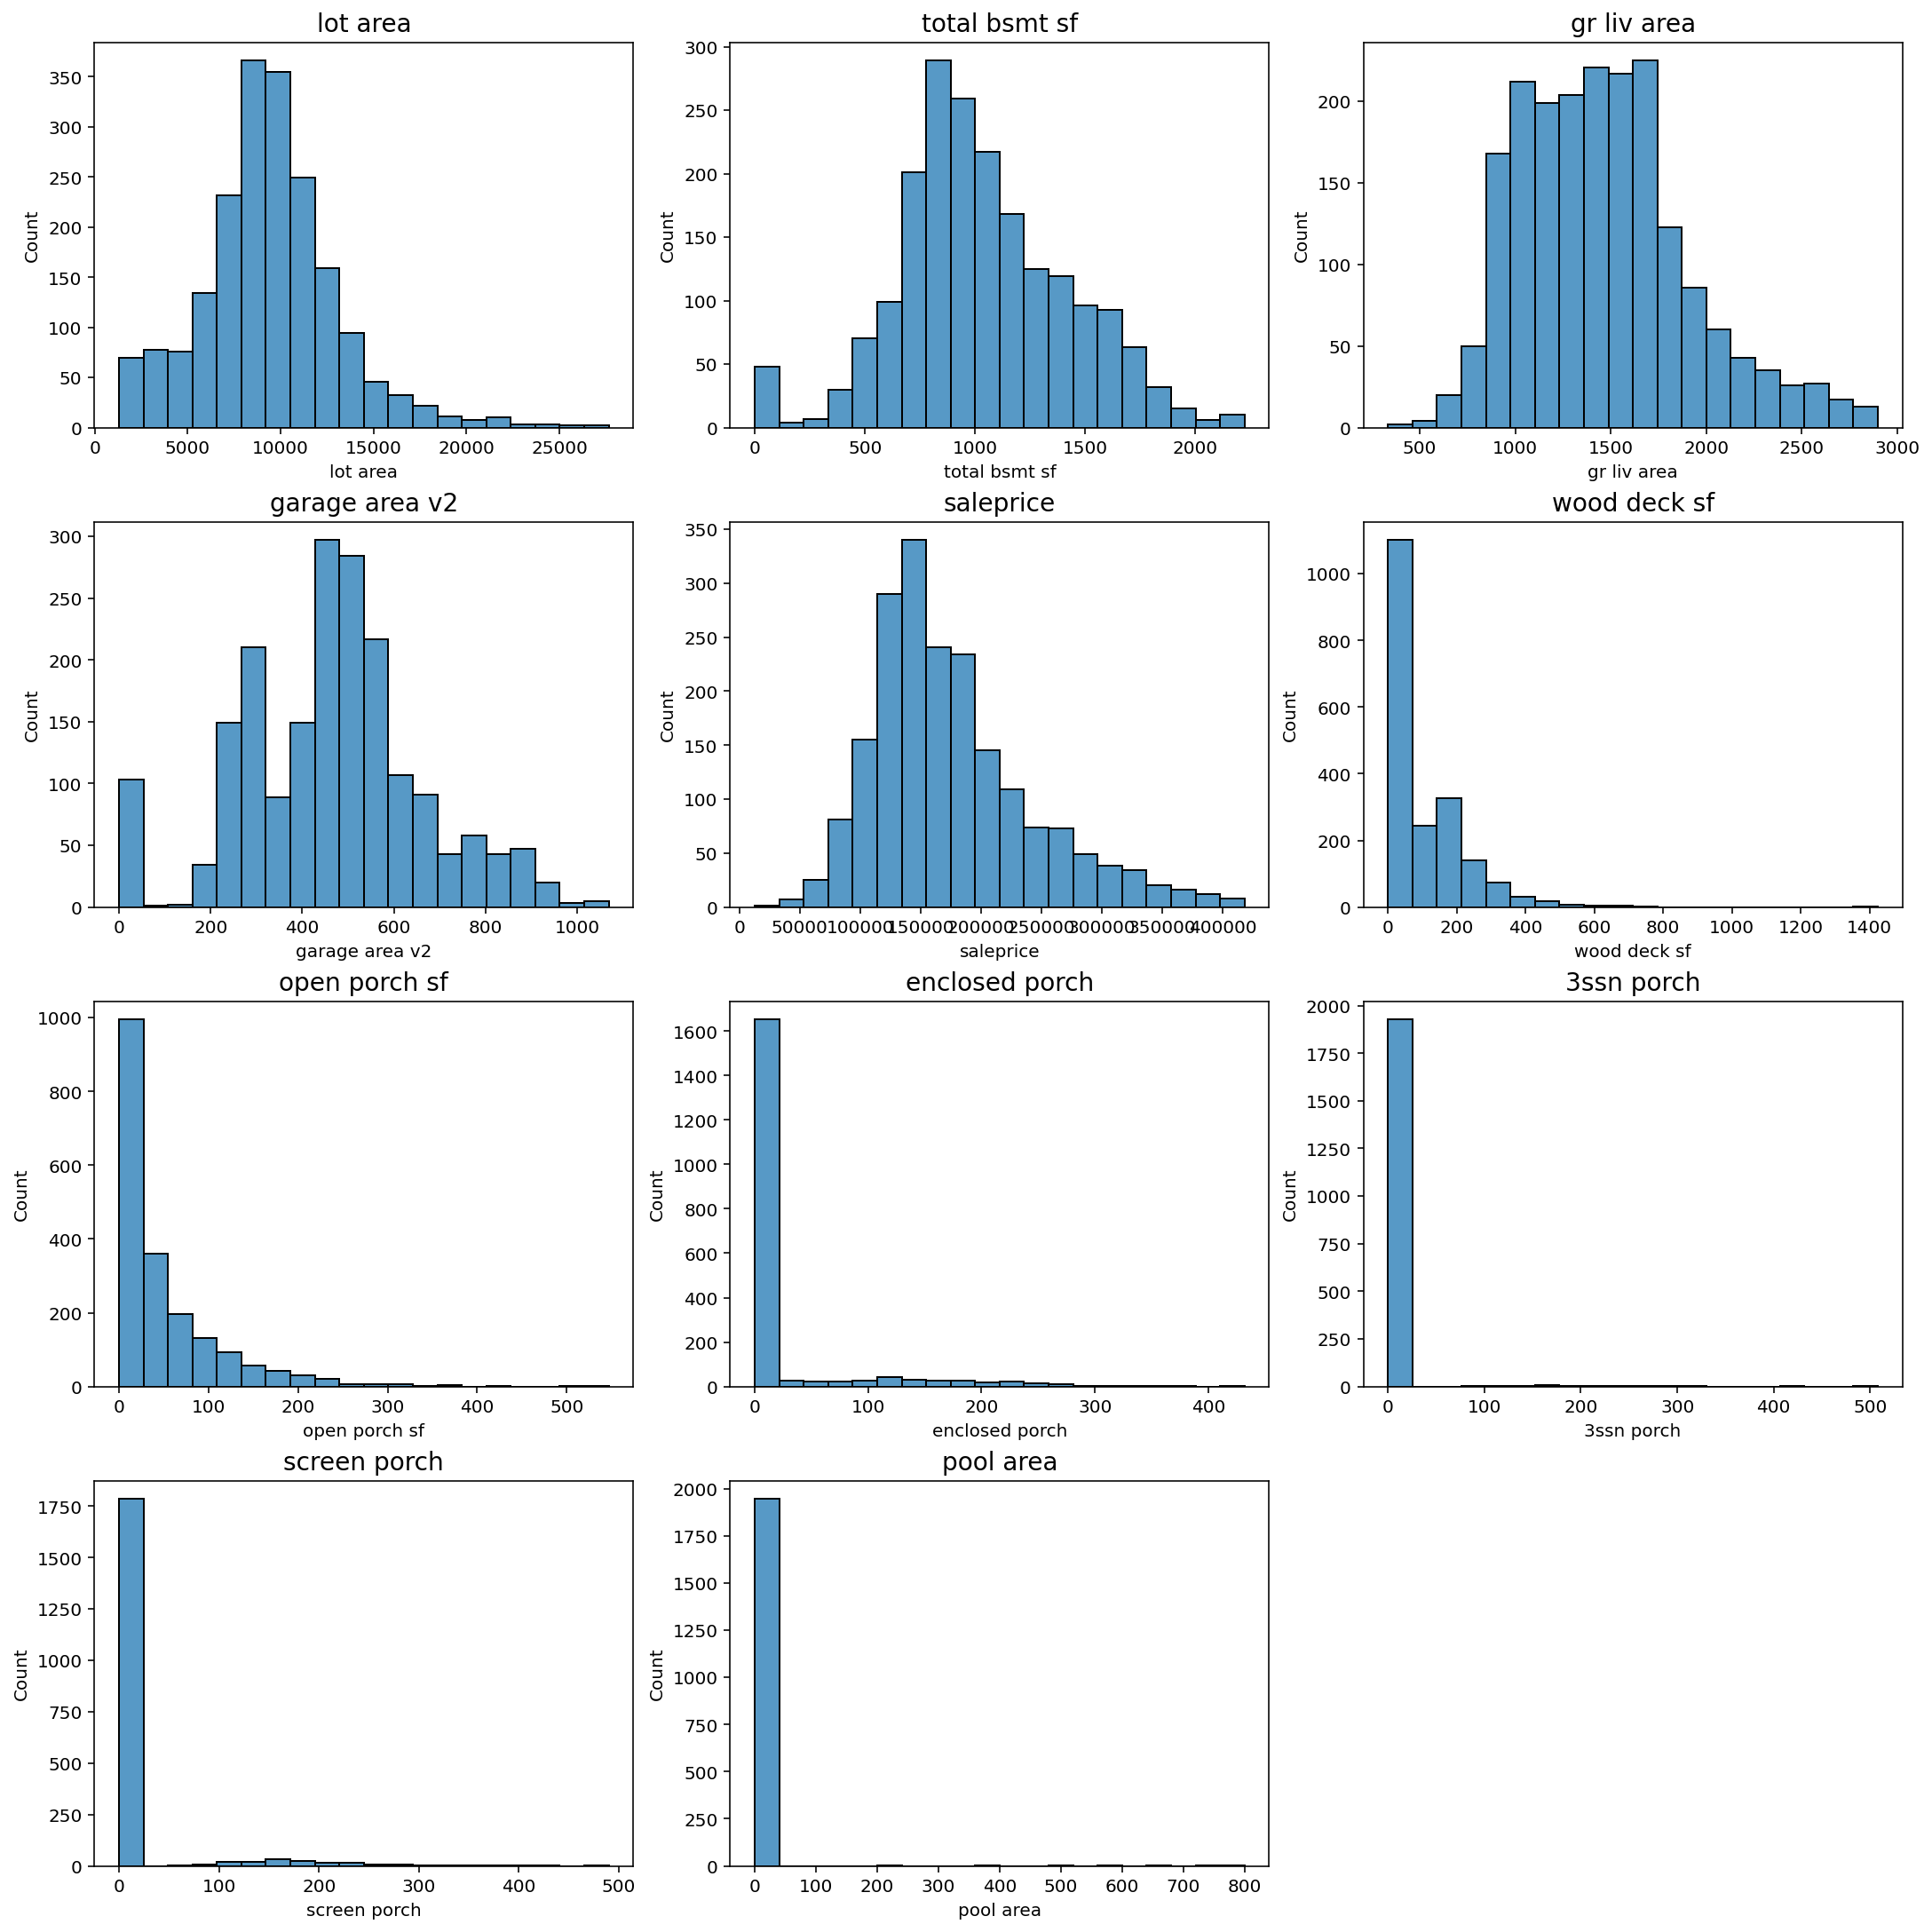

In [17]:
#plot histogram matrix
fig, axes = plt.subplots(4, 3, figsize=(15,15), sharey=False, layout="constrained")

#histogram lot area
sns.histplot(data=ames_df, x="lot area", bins=20, ax=axes[0,0]).axes.set_title("lot area", fontsize=14)
#histogram total bsmt sf
sns.histplot(data=ames_df, x="total bsmt sf", bins=20, ax=axes[0,1]).axes.set_title("total bsmt sf", fontsize=14)
#histogram gr liv area
sns.histplot(data=ames_df, x="gr liv area", bins=20, ax=axes[0,2]).axes.set_title("gr liv area", fontsize=14)
#histogram garage area v2
sns.histplot(data=ames_df, x="garage area v2", bins=20, ax=axes[1,0]).axes.set_title("garage area v2", fontsize=14)
#histogram saleprice
sns.histplot(data=ames_df, x="saleprice", bins=20, ax=axes[1,1]).axes.set_title("saleprice", fontsize=14)
#histogram wood deck sf
sns.histplot(data=ames_df, x="wood deck sf", bins=20, ax=axes[1,2]).axes.set_title("wood deck sf", fontsize=14)
#histogram open porch sf
sns.histplot(data=ames_df, x="open porch sf", bins=20, ax=axes[2,0]).axes.set_title("open porch sf", fontsize=14)
#histogram enclosed porch
sns.histplot(data=ames_df, x="enclosed porch", bins=20, ax=axes[2,1]).axes.set_title("enclosed porch", fontsize=14)
#histogram 3ssn porch
sns.histplot(data=ames_df, x="3ssn porch", bins=20, ax=axes[2,2]).axes.set_title("3ssn porch", fontsize=14)
#histogram screen porch
sns.histplot(data=ames_df, x="screen porch", bins=20, ax=axes[3,0]).axes.set_title("screen porch", fontsize=14)
#histogram pool area
sns.histplot(data=ames_df, x="pool area", bins=20, ax=axes[3,1]).axes.set_title("pool area", fontsize=14)

axes[3,2].set_axis_off()

1. Variables with low variabilities are usually not good predictors in a model. Variables that represent unique features of the property (e.g. types of porch, pool area) are typically with very low variability as most of the inputs are 0 (i.e. majority of the properties do not have the feature). These variables would be excluded from the model.

2. Generally, the 4 predictor variables (lot area, total bsmt sf, gr liv area, garage area v2) are slightly right-skewed. Nevertheless, we can still include them in the model.

##### Selection of Categorical Variables

[Text(0.5, 1.0, 'Count by bsmt qual scale')]

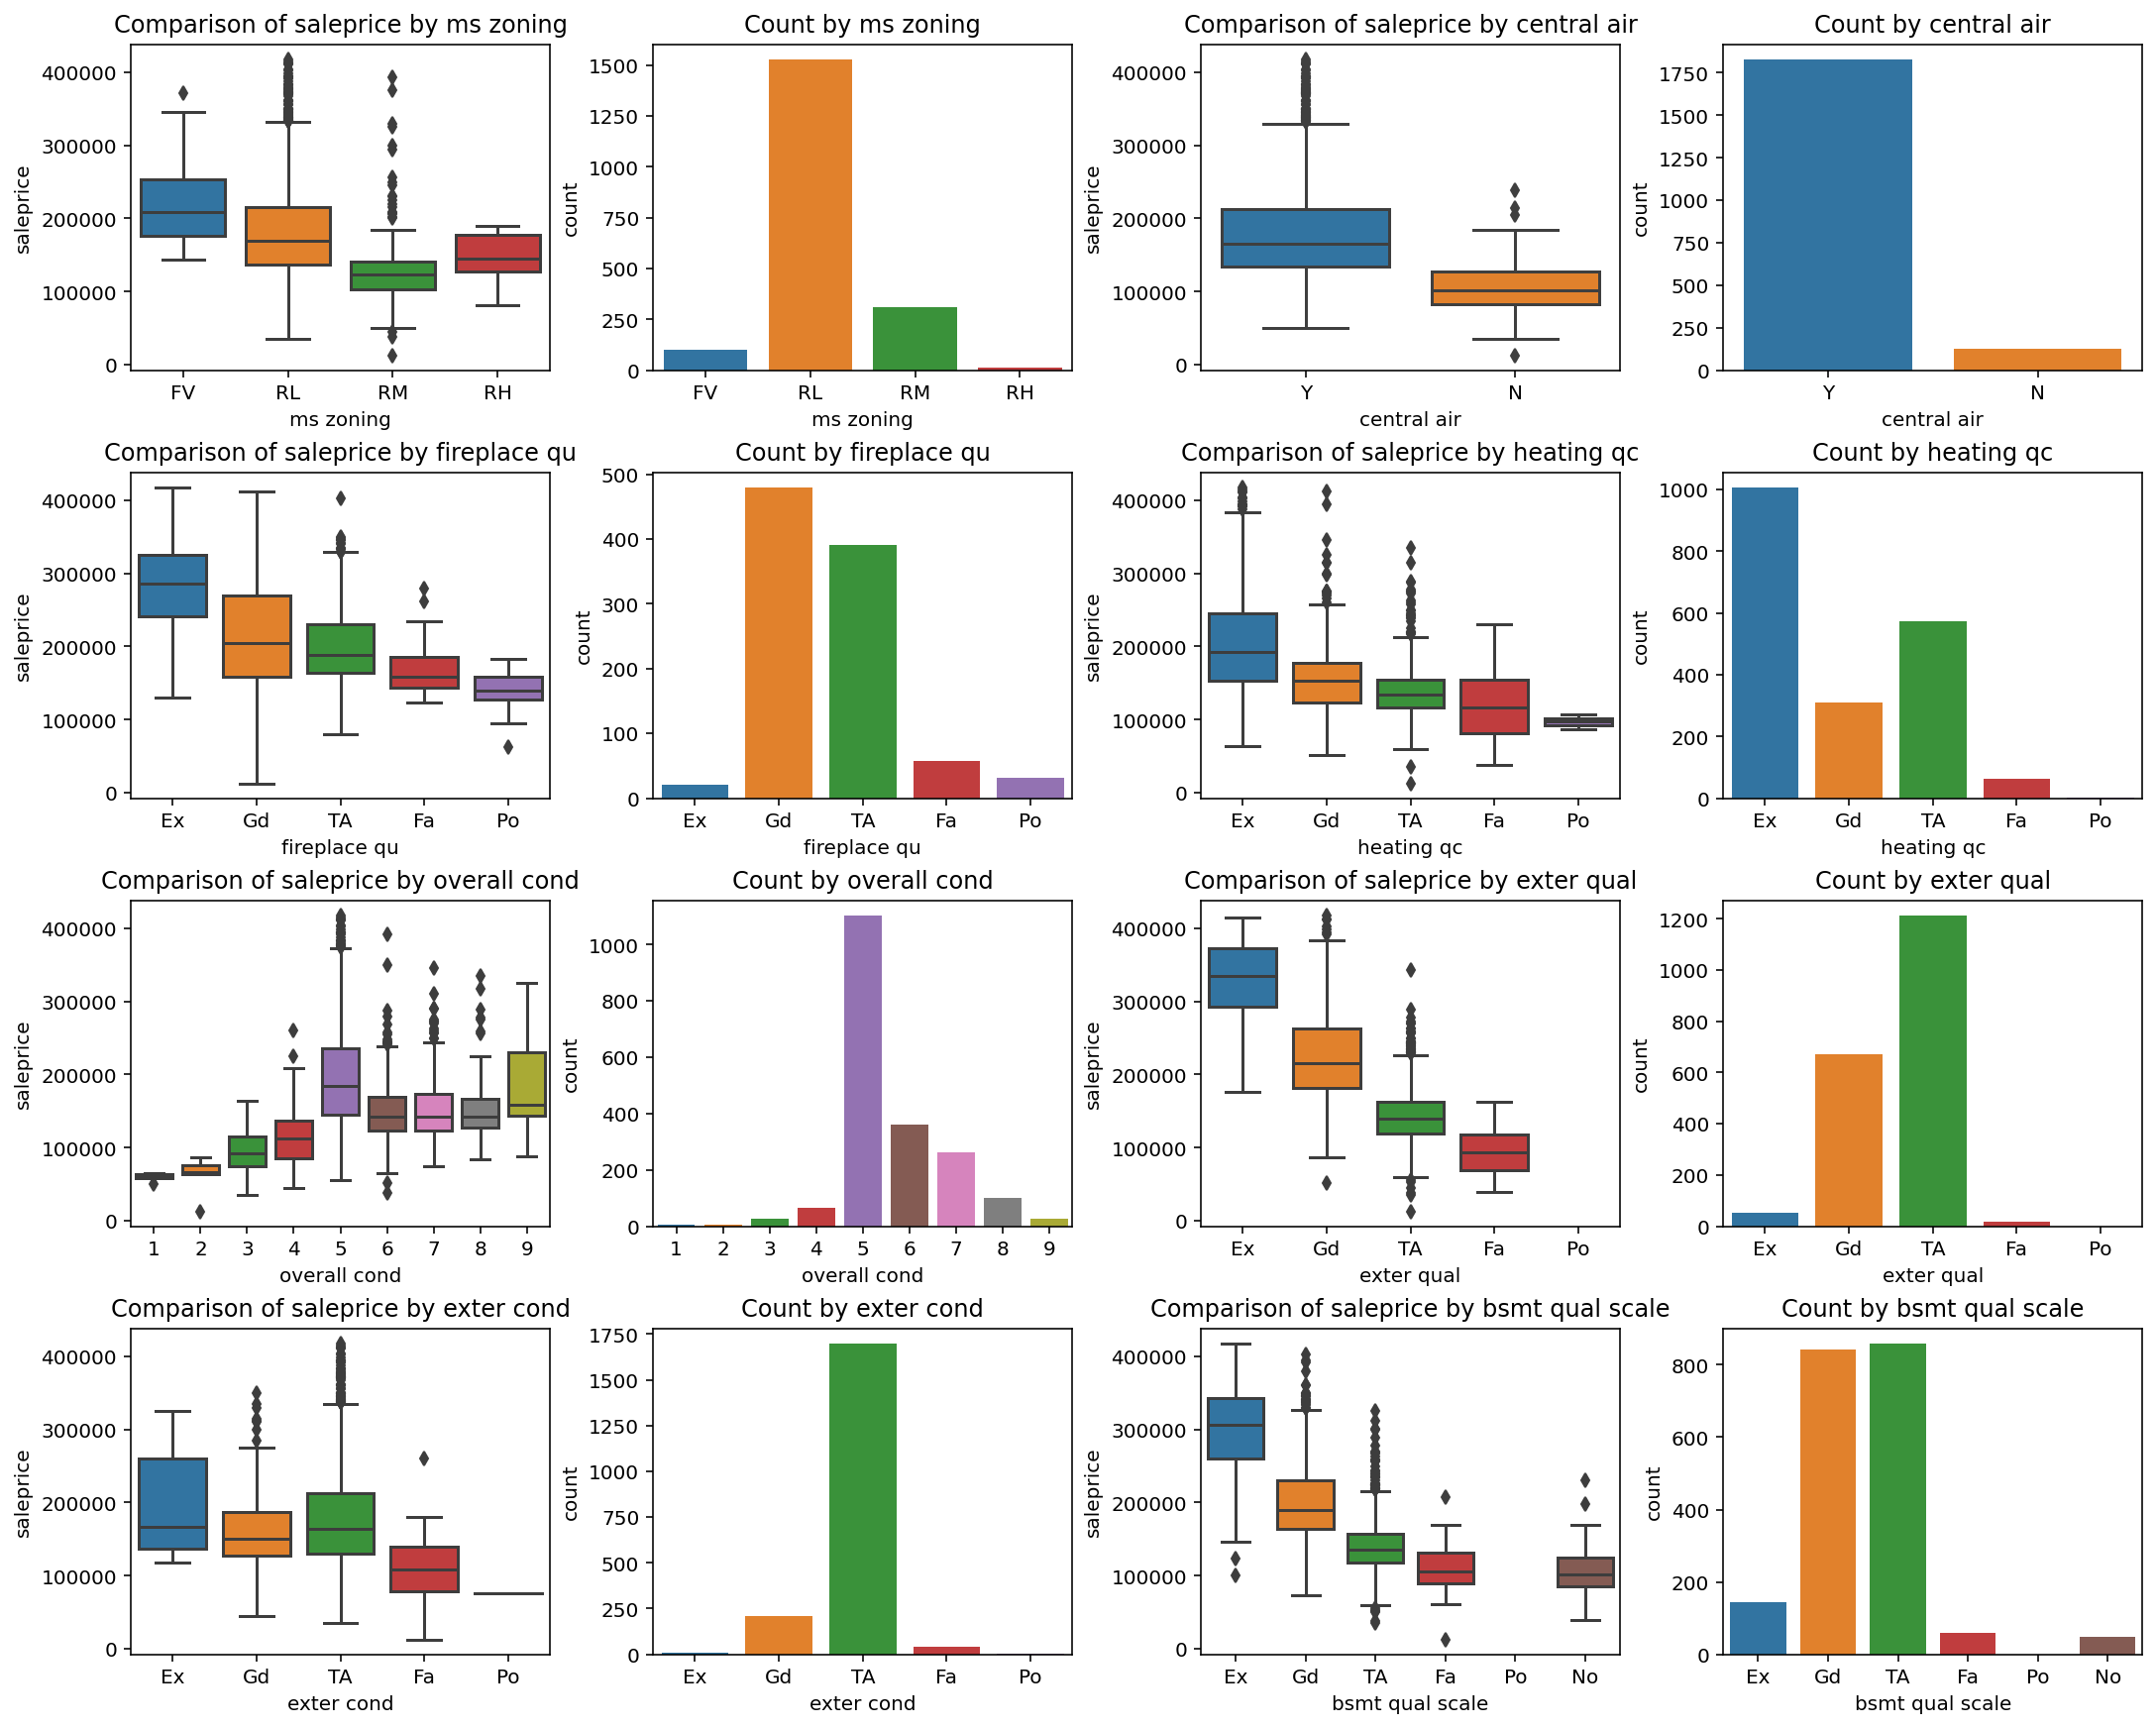

In [18]:
fig, axes = plt.subplots(4, 4, figsize=(15,12), sharey=False, layout="constrained")

#boxplot of ms zoning vs saleprice to observe trends
sns.boxplot(x='ms zoning', y='saleprice', data=ames_df, order=["FV","RL","RM","RH"], ax=axes[0,0]).set(title='Comparison of saleprice by ms zoning')
#countplot to examine the frequencies of each categories
sns.countplot(x = "ms zoning", data = ames_df, order=["FV","RL","RM","RH"], ax=axes[0,1]).set(title='Count by ms zoning')

#boxplot of central air vs saleprice to observe trends
sns.boxplot(x='central air', y='saleprice', data=ames_df, ax=axes[0,2]).set(title='Comparison of saleprice by central air')
#countplot to examine the frequencies of each categories
sns.countplot(x = "central air", data = ames_df, order=["Y","N"], ax=axes[0,3]).set(title='Count by central air')

#boxplots to compare heating and fireplace quality with saleprice to observe trends
sns.boxplot(x='fireplace qu', y='saleprice', data=ames_df, 
            order=["Ex","Gd","TA","Fa", 'Po'], ax=axes[1,0]).set(title='Comparison of saleprice by fireplace qu')
sns.boxplot(x='heating qc', y='saleprice', data=ames_df, 
            order=["Ex","Gd","TA","Fa", 'Po'], ax=axes[1,2]).set(title='Comparison of saleprice by heating qc')
#countplot to examine the frequencies of each categories
sns.countplot(x = "fireplace qu", data = ames_df, order=["Ex","Gd","TA","Fa", 'Po'], ax=axes[1,1]).set(title='Count by fireplace qu')
sns.countplot(x = "heating qc", data = ames_df, order=["Ex","Gd","TA","Fa", 'Po'], ax=axes[1,3]).set(title='Count by heating qc')

#boxplot for 'overall cond' with 'saleprice'
sns.boxplot(x='overall cond', y='saleprice', data=ames_df, ax=axes[2,0]).set(title='Comparison of saleprice by overall cond')
#countplot to examine the frequencies of each categories
sns.countplot(x = "overall cond", data = ames_df, ax=axes[2,1]).set(title='Count by overall cond')

#boxplot for 'exter qual' with 'saleprice'
sns.boxplot(x='exter qual', y='saleprice', data=ames_df, order=["Ex","Gd","TA","Fa", 'Po'], ax=axes[2,2]).set(title='Comparison of saleprice by exter qual')
#countplot to examine the frequencies of each categories
sns.countplot(x = "exter qual", data = ames_df, order=["Ex","Gd","TA","Fa", 'Po'], ax=axes[2,3]).set(title='Count by exter qual')

#boxplot for 'exter cond' with 'saleprice'
sns.boxplot(x='exter cond', y='saleprice', data=ames_df, order=["Ex","Gd","TA","Fa", 'Po'], ax=axes[3,0]).set(title='Comparison of saleprice by exter cond')
#countplot to examine the frequencies of each categories
sns.countplot(x = "exter cond", data = ames_df, order=["Ex","Gd","TA","Fa", 'Po'], ax=axes[3,1]).set(title='Count by exter cond')

#to impute NA as "No" basement
ames_df['bsmt qual scale'] = ames_df['bsmt qual'].fillna('No')
#boxplot for 'bsmt qual scale' with 'saleprice'
sns.boxplot(x='bsmt qual scale', y='saleprice', data=ames_df, order=["Ex","Gd","TA","Fa", "Po", "No"], ax=axes[3,2]).set(title='Comparison of saleprice by bsmt qual scale')
#countplot to examine the frequencies of each categories
sns.countplot(x = "bsmt qual scale", data = ames_df, order=["Ex","Gd","TA","Fa", "Po", "No"], ax=axes[3,3]).set(title='Count by bsmt qual scale')


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 [Text(0, 0, 'Sawyer'),
  Text(1, 0, 'SawyerW'),
  Text(2, 0, 'NAmes'),
  Text(3, 0, 'Timber'),
  Text(4, 0, 'Edwards'),
  Text(5, 0, 'OldTown'),
  Text(6, 0, 'BrDale'),
  Text(7, 0, 'CollgCr'),
  Text(8, 0, 'Somerst'),
  Text(9, 0, 'Mitchel'),
  Text(10, 0, 'StoneBr'),
  Text(11, 0, 'NridgHt'),
  Text(12, 0, 'Gilbert'),
  Text(13, 0, 'Crawfor'),
  Text(14, 0, 'Veenker'),
  Text(15, 0, 'MeadowV'),
  Text(16, 0, 'NWAmes'),
  Text(17, 0, 'SWISU'),
  Text(18, 0, 'NoRidge'),
  Text(19, 0, 'ClearCr'),
  Text(20, 0, 'Blmngtn'),
  Text(21, 0, 'IDOTRR'),
  Text(22, 0, 'BrkSide'),
  Text(23, 0, 'NPkVill'),
  Text(24, 0, 'Blueste'),
  Text(25, 0, 'GrnHill'),
  Text(26, 0, 'Greens'),
  Text(27, 0, 'Landmrk')])

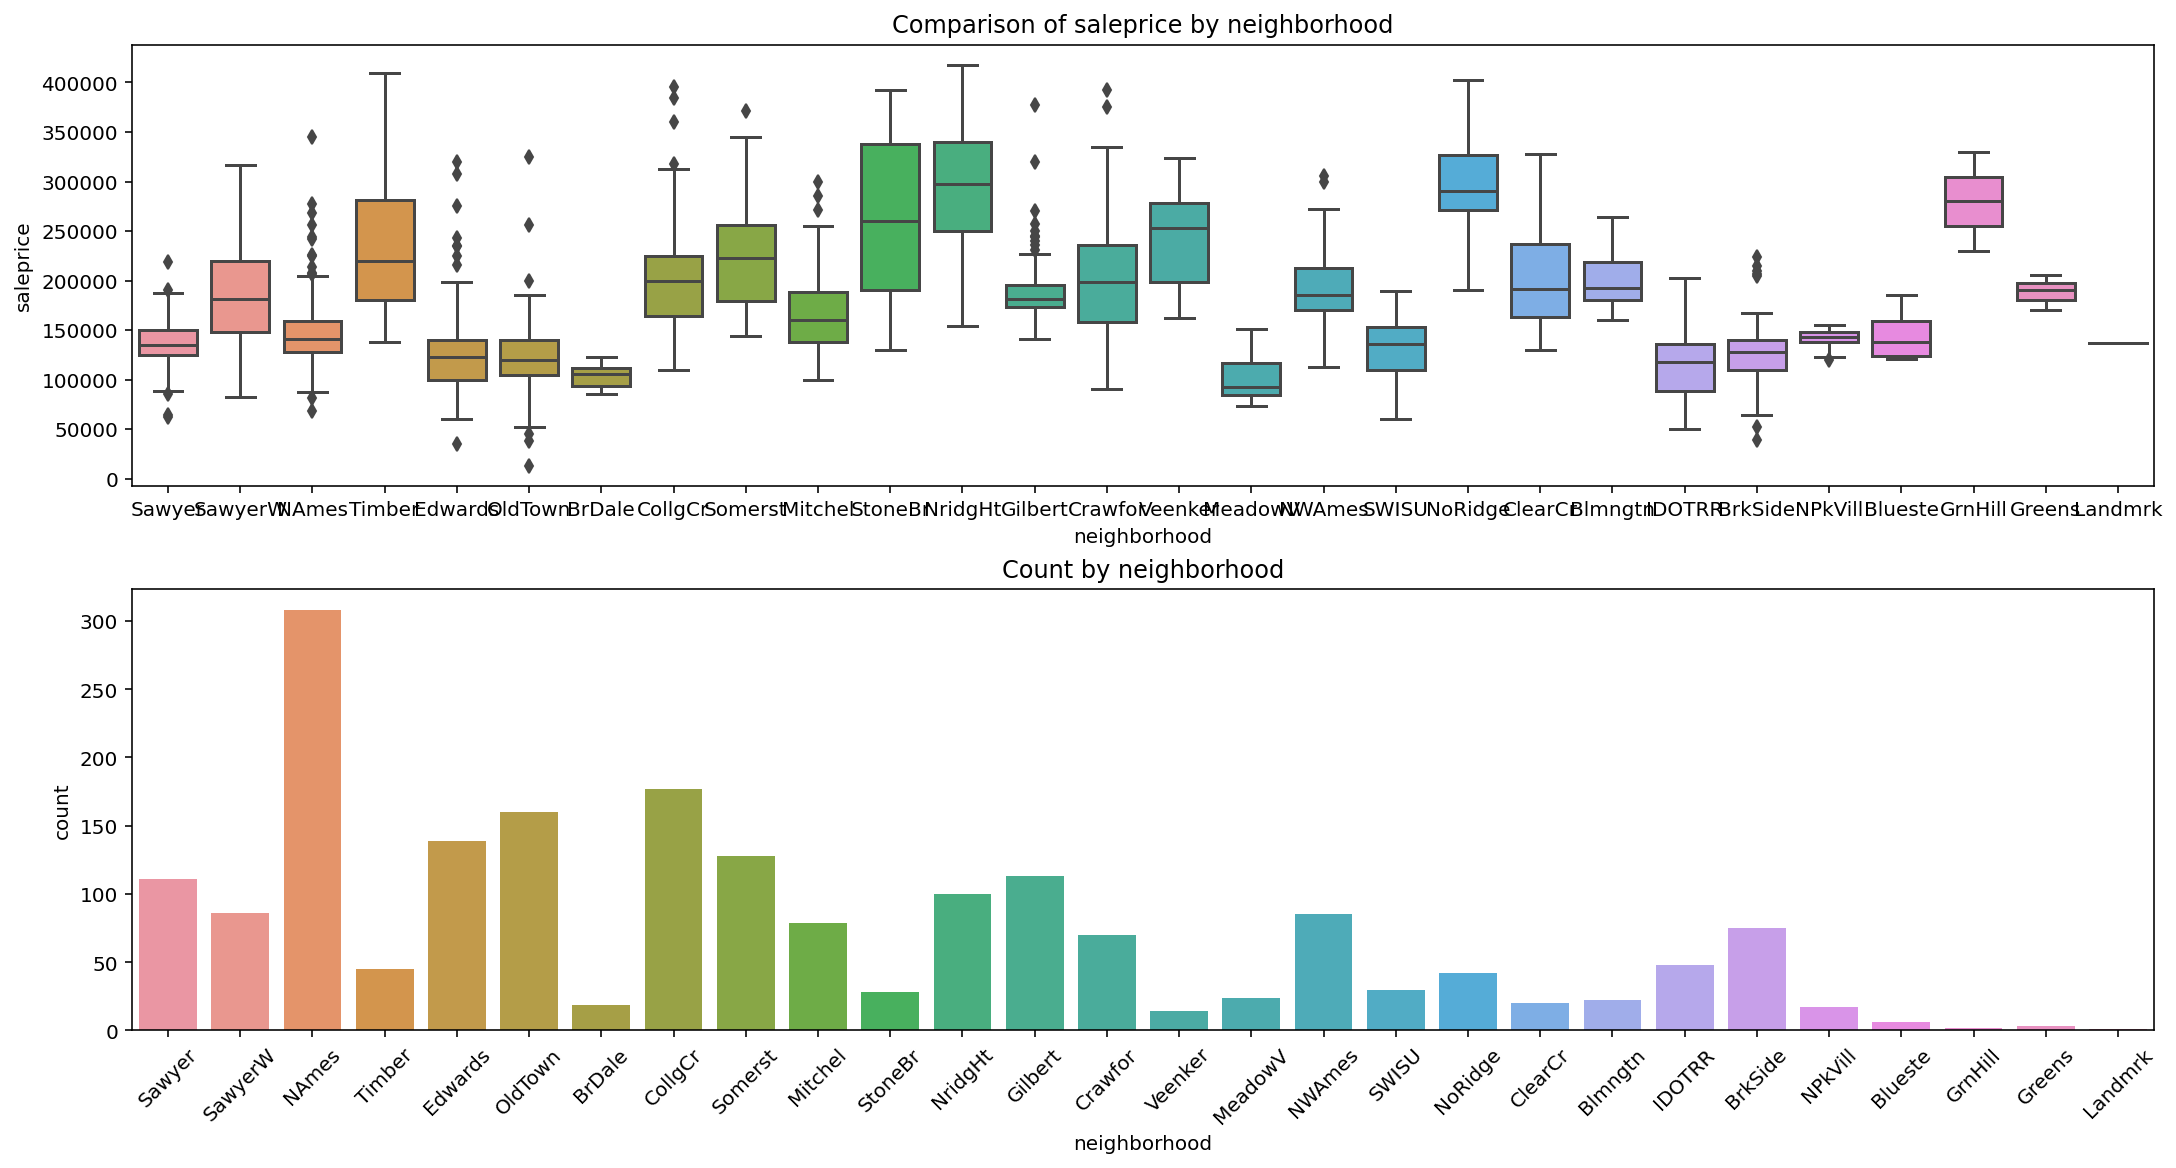

In [19]:
fig, axes = plt.subplots(2, 1, figsize=(15,8), sharey=False, layout="constrained")
#boxplot of neighbourhood vs saleprice to observe trends
sns.boxplot(x='neighborhood', y='saleprice', data=ames_df, ax=axes[0]).set(title='Comparison of saleprice by neighborhood')
#countplot to examine the frequencies of each categories
sns.countplot(x = "neighborhood", data = ames_df, ax=axes[1]).set(title='Count by neighborhood')
plt.xticks(rotation=45)

1. There are significant differences in the saleprice are observed across the different categories within 'ms zoning' and 'central air' categories respectively. However, the distribution of 'ms zoning' data is largely concentrated on RL, and least represented on RH. Similarly, houses with central air conditioning is overly represented.
2. For variables 'fireplace qu' and ' heating qc', a general upward trend in saleprice is observed as the quality of the fireplace or heating improves. The distribution across the categories within both variables were not evenly distributed as well. Since both variables are related to keeping the home environment warm, they can be combined both to form a new variable. 
3. There is slight increase of 'saleprice' with increase in 'overall cond', but it seemed that the variance is quite low. The score was largely weighted on 5. As a property buyer, overall condition of the property may affect the amount that a buy would be willing to pay. This feature will be included to assess the correlation and also the strength of the feature on the outcome.
4. For 'external qual', 'external cond', 'bsmt qual scale', the trend with 'saleprice' is either not consistent or that certain categories are under-represented. These variables may be represented in part by the 'overall qual' and 'overall cond' variables. Hence, these variables will be dropped. 
5. From the boxplot of 'neighborhood' against 'saleprice', it is observed that properties in different neighbourhood could fetch different prices. In the Feature Engineering section, the neighbourhoods will be ranked according to the median saleprice and the trending will be explored. 

### Model Preprocessing

#### Feature Engineering

In [20]:
#create variable: age of property upon sale
ames_df['property_age'] = ames_df['yr sold']-ames_df['year built']

<AxesSubplot:xlabel='condition 1', ylabel='saleprice'>

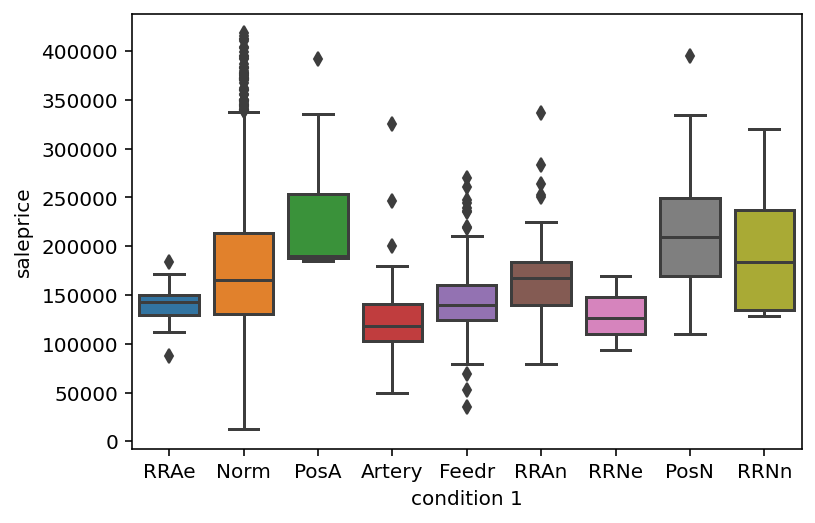

In [21]:
#boxplot of 
sns.boxplot(x='condition 1', y='saleprice', data=ames_df)

In [22]:
#majority of the properties are classified under 'Norm' for both condition 1 and 2 
#--> will only use condition 1 as a predictor
ames_df['condition 1'].groupby(ames_df['condition 2']).value_counts()

condition 2  condition 1
Artery       Artery            2
             Feedr             1
             RRAn              1
             RRNn              1
Feedr        RRAn              7
             Feedr             1
             RRNn              1
Norm         Norm           1686
             Feedr            95
             Artery           64
             RRAn             27
             PosN             21
             RRAe             21
             PosA             10
             RRNn              4
             RRNe              3
PosA         Artery            1
             PosA              1
PosN         PosN              1
RRAe         Feedr             1
RRAn         Feedr             1
RRNn         Feedr             2
Name: condition 1, dtype: int64

In [23]:
#to map all conditions related to proximity to transportation routes as '1'. 
#these are assumed to have negative impact on the price due to the noise
def transport_routes(x):
     if 'Artery' in x:
        return 1
     elif 'Feedr' in x:
        return 1
     elif 'RRAn' in x:
        return 1
     elif 'RRNn' in x:
        return 1
     elif 'RRAe' in x:
        return 1
     elif 'RRNe' in x:
        return 1
     else:
        return 0

ames_df['transport1'] = ames_df['condition 1'].map(transport_routes)

In [24]:
#heating and fireplace quality of the house may be important predictor of property price as it is essential for the cold weather
#to create a new variable heat_quality to combine both features of 'heating qc' and 'fireplace qu'

#to rank 'fireplace qu' and 'heating qc'
ames_df['fireplace qu v2'] = ames_df['fireplace qu'].fillna('No')
ames_df['fireplace_qu_scale'] = ames_df['fireplace qu v2'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'No':0})
ames_df['heating_qc_scale'] = ames_df['heating qc'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1})

#new variable 'heat_quality' with min score of 1 and max score of 10.
ames_df['heat_quality'] = ames_df['fireplace_qu_scale'] + ames_df['heating_qc_scale']

#### Processing of Variables

In [25]:
#to map for 'central air': "Y" = 1; "N" = 0
ames_df['central_air_scale'] = ames_df['central air'].map({'Y':1, 'N':0})

In [26]:
#one-hot encoding to create dummies for nominal variables: 'ms zoning', 'central_air_scale', 'transport1'.
ames_df = pd.get_dummies(ames_df, columns=['ms zoning','central_air_scale','transport1','neighborhood'])

Text(0.5, 1.0, 'distribution of saleprice')

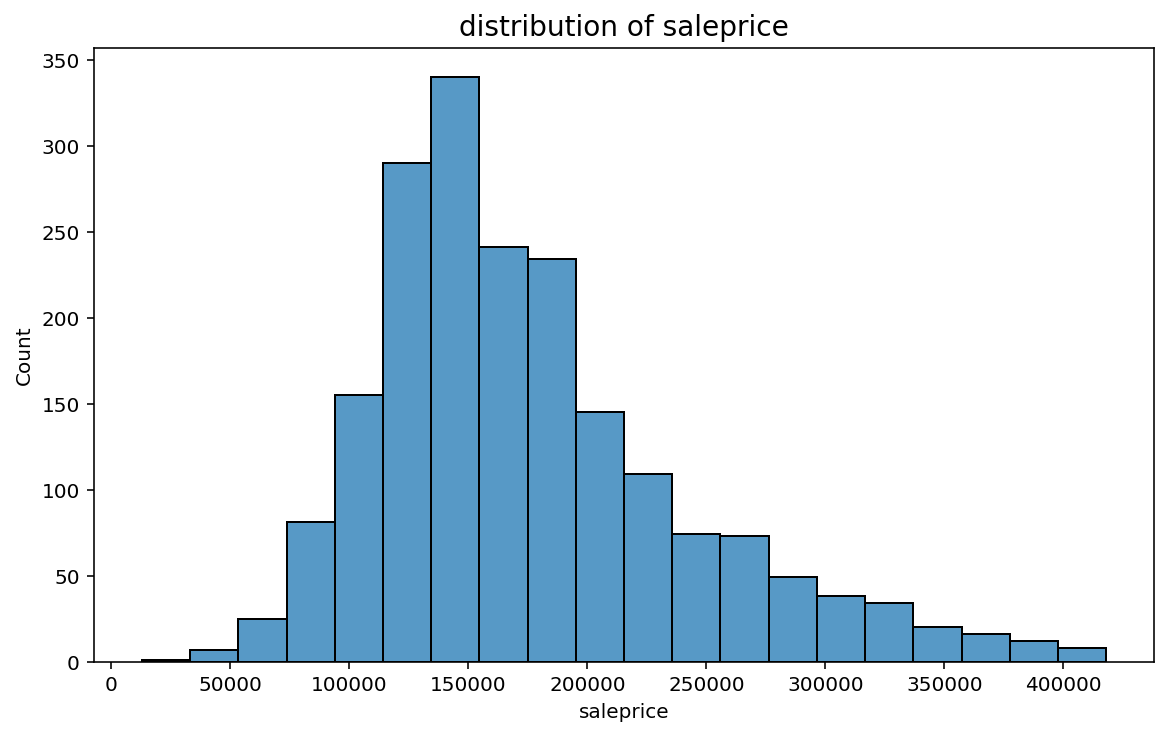

In [27]:
#plot histogram matrix
fig, axes = plt.subplots( figsize=(8,5), sharey=False, layout="constrained")

#distribution for saleprice, saleprice_log, pricepsf
sns.histplot(data=ames_df, x="saleprice", bins=20).axes.set_title("distribution of saleprice", fontsize=14)


- The distribution of 'saleprice' is moderately right-skewed.

In [28]:
#correlation matrix of neighborhood dummy variables to assess for correlation with saleprice
dummy_var = ['neighborhood_Blmngtn', 'neighborhood_Blueste', 'neighborhood_BrDale', 
             'neighborhood_BrkSide', 'neighborhood_ClearCr', 'neighborhood_CollgCr', 
             'neighborhood_Crawfor', 'neighborhood_Edwards', 'neighborhood_Gilbert', 
             'neighborhood_Greens', 'neighborhood_GrnHill', 'neighborhood_IDOTRR', 
             'neighborhood_Landmrk', 'neighborhood_MeadowV', 'neighborhood_Mitchel', 
             'neighborhood_NAmes', 'neighborhood_NPkVill', 'neighborhood_NWAmes', 
             'neighborhood_NoRidge', 'neighborhood_NridgHt', 'neighborhood_OldTown', 
             'neighborhood_SWISU', 'neighborhood_Sawyer', 'neighborhood_SawyerW', 
             'neighborhood_Somerst', 'neighborhood_StoneBr', 'neighborhood_Timber', 
             'neighborhood_Veenker', 'saleprice']
outcome = ['saleprice']
#ames_df[dummy_var].corr(ames_df['saleprice'])

ames_df.corr().loc[dummy_var, outcome].round(3).sort_values('saleprice', ascending=False)

,saleprice
saleprice,1.000
neighborhood_NridgHt,0.414
neighborhood_NoRidge,0.272
neighborhood_Somerst,0.196
neighborhood_StoneBr,0.166
neighborhood_Timber,0.146
neighborhood_CollgCr,0.117
neighborhood_Crawfor,0.089
neighborhood_Veenker,0.087
neighborhood_Gilbert,0.056


In [29]:
#'neighborhood_NridgHt' has maximum saleprice
ames_df[ames_df['neighborhood_NridgHt']== 1].sort_values('saleprice', ascending=False).head()

,id,pid,ms subclass,lot frontage,lot area,street,alley,lot shape,land contour,utilities,lot config,land slope,condition 1,condition 2,bldg type,house style,overall qual,overall cond,year built,year remod/add,roof style,roof matl,exterior 1st,exterior 2nd,mas vnr type,mas vnr area,exter qual,exter cond,foundation,bsmt qual,bsmt cond,bsmt exposure,bsmtfin type 1,bsmtfin sf 1,bsmtfin type 2,bsmtfin sf 2,bsmt unf sf,total bsmt sf,heating,heating qc,central air,electrical,1st flr sf,2nd flr sf,low qual fin sf,gr liv area,bsmt full bath,bsmt half bath,full bath,half bath,bedroom abvgr,kitchen abvgr,kitchen qual,totrms abvgrd,functional,fireplaces,fireplace qu,garage type,garage yr blt,garage finish,garage cars,garage area,garage qual,garage cond,paved drive,wood deck sf,open porch sf,enclosed porch,3ssn porch,screen porch,pool area,pool qc,fence,misc feature,misc val,mo sold,yr sold,sale type,saleprice,mas vnr area v2,total bsmt sf v2,garage area v2,utilities_scale,bsmt qual scale,property_age,fireplace qu v2,fireplace_qu_scale,heating_qc_scale,heat_quality,ms zoning_FV,ms zoning_RH,ms zoning_RL,ms zoning_RM,central_air_scale_0,central_air_scale_1,transport1_0,transport1_1,neighborhood_Blmngtn,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_GrnHill,neighborhood_IDOTRR,neighborhood_Landmrk,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker
361,1701,528118040,60,118.0,13654,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Norm,Norm,1Fam,2Story,9,5,2005,2006,Gable,CompShg,MetalSd,MetalSd,BrkFace,365.0,Gd,TA,PConc,Ex,TA,Gd,Unf,0.0,Unf,0.0,1704.0,1704.0,GasA,Ex,Y,SBrkr,1722,1036,0,2758,0.0,0.0,2,1,4,1,Ex,9,Typ,1,Ex,BuiltIn,2005.0,Fin,3.0,814.0,TA,TA,Y,282,55,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,418000,365.0,1704.0,814.0,4,Ex,2,Ex,5,5,10,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1639,1691,528106040,20,107.0,14450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,1Story,9,5,2006,2007,Gable,CompShg,CemntBd,CmentBd,BrkFace,315.0,Ex,TA,PConc,Ex,TA,Gd,Unf,0.0,Unf,0.0,2121.0,2121.0,GasA,Ex,Y,SBrkr,2121,0,0,2121,0.0,0.0,2,1,3,1,Ex,8,Typ,1,Ex,Attchd,2007.0,Fin,3.0,732.0,TA,TA,Y,124,98,0,0,142,0,NaN,NaN,NaN,0,5,2007,New,415298,315.0,2121.0,732.0,4,Ex,1,Ex,5,5,10,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2041,1065,528166120,60,110.0,13688,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,2Story,9,5,2003,2004,Gable,CompShg,VinylSd,VinylSd,BrkFace,664.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1016.0,Unf,0.0,556.0,1572.0,GasA,Ex,Y,SBrkr,1572,1096,0,2668,1.0,0.0,2,1,3,1,Ex,10,Typ,2,Gd,BuiltIn,2003.0,Fin,3.0,726.0,TA,TA,Y,400,0,0,0,0,0,NaN,NaN,NaN,0,3,2008,WD,412500,664.0,1572.0,726.0,4,Ex,5,Gd,4,5,9,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
726,2380,528102080,60,72.0,16387,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,2Story,9,5,2006,2006,Hip,CompShg,VinylSd,VinylSd,Stone,215.0,Gd,TA,PConc,Ex,Gd,No,GLQ,1369.0,Unf,0.0,369.0,1738.0,GasA,Gd,Y,SBrkr,1738,851,0,2589,1.0,0.0,2,1,4,1,Ex,11,Typ,1,Gd,Attchd,2006.0,RFn,3.0,831.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,New,412083,215.0,1738.0,831.0,4,Ex,0,Gd,4,4,8,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1624,430,528108130,20,95.0,12350,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,1Story,9,5,2008,2008,Hip,CompShg,VinylSd,VinylSd,Stone,450.0,Ex,TA,PConc,Ex,TA,Av,GLQ,1232.0,Unf,0.0,788.0,2020.0,GasA,Ex,Y,SBrkr,2020,0,0,2020,1.0,0.0,2,0,3,1,Ex,7,Typ,1,Gd,Attchd,2008.0,RFn,3.0,896.0,TA,TA,Y,192,98,0,0,0,0,NaN,NaN,NaN,0,5,2009,WD,404000,450.0,2020.0,896.0,4,Ex,1,Gd,4,5,9,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

Based on the list correlations with 'saleprice', 'neighborhood_NridgHt' has the highest in value. Coincidentally, this variable has the highest 'salevalue' as well. Thus, we will only include this variable in the model.

#### Assessment of all Variables

In [30]:
#correlation matrix of variables to assess for multicollinearity
variables = ['property_age', 'lot area', 'total bsmt sf',
             'gr liv area', 'garage area v2', 'bedroom abvgr',
             'kitchen abvgr', 'full bath', 'heat_quality', 
             'central_air_scale_1', 'overall qual', 'overall cond', 
             'transport1_0', 'ms zoning_RH', 'ms zoning_FV', 
             'ms zoning_RM', 'neighborhood_NridgHt', 'saleprice']

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


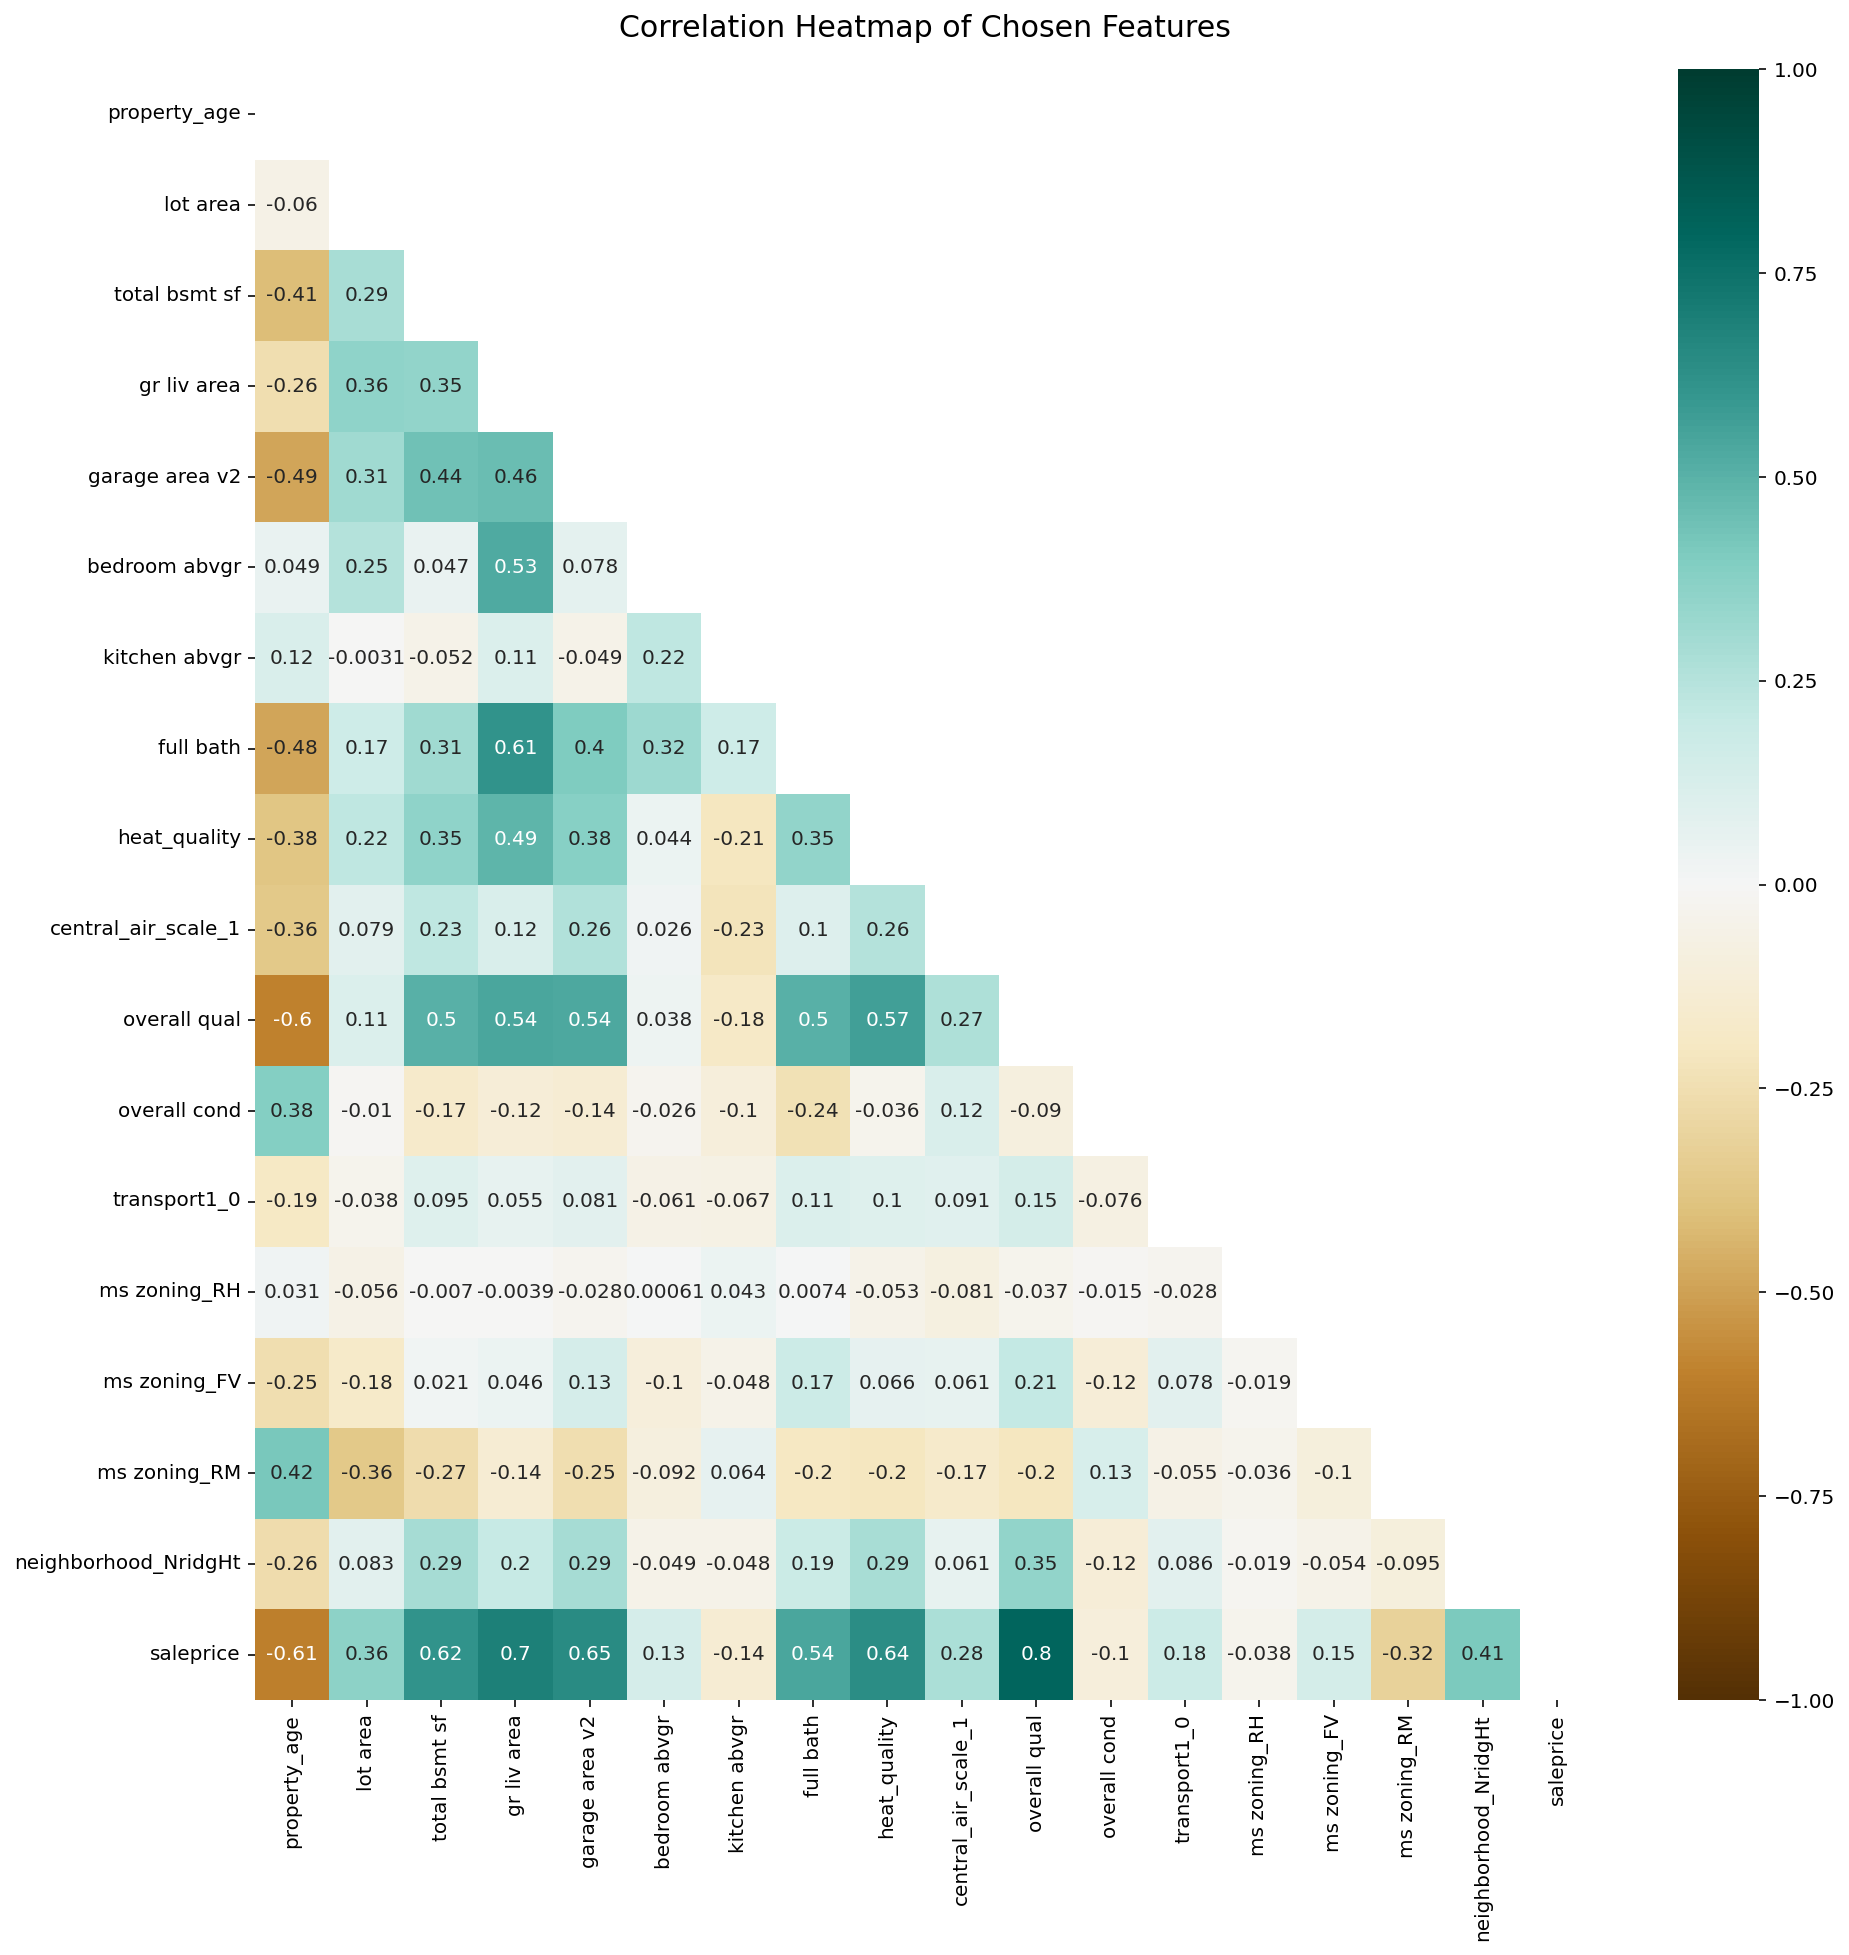

In [31]:
#correlation heatmap
plt.figure(figsize=(15,15))
mask = np.triu(np.ones_like(ames_df[variables].corr(), dtype=np.bool))
corrheatmap = sns.heatmap(ames_df[variables].corr(), annot=True, cmap='BrBG', vmin=-1, vmax=1, mask=mask)
corrheatmap.set_title('Correlation Heatmap of Chosen Features', fontdict={'fontsize':15}, pad=16);

Based on the initial correlation assessment for all the features selected, 'gr liv area' is highly correlated with 'totrms abvgrd' (correlation coefficient: 0.8). 'totrms abvgr' was removed as the number of bedrooms and kitchens above grade can be used as proxies to the total number of rooms. Generally, 'gr liv area' is considered as an important feature for predicting the property price as the price is usually pegged to the surface area. 

There is no multicollinearity between other feature-pairs as all correlation coefficients are less than 0.7.

Variables with low correlation with the outcome variable (saleprice) are included as a first cut for the model.

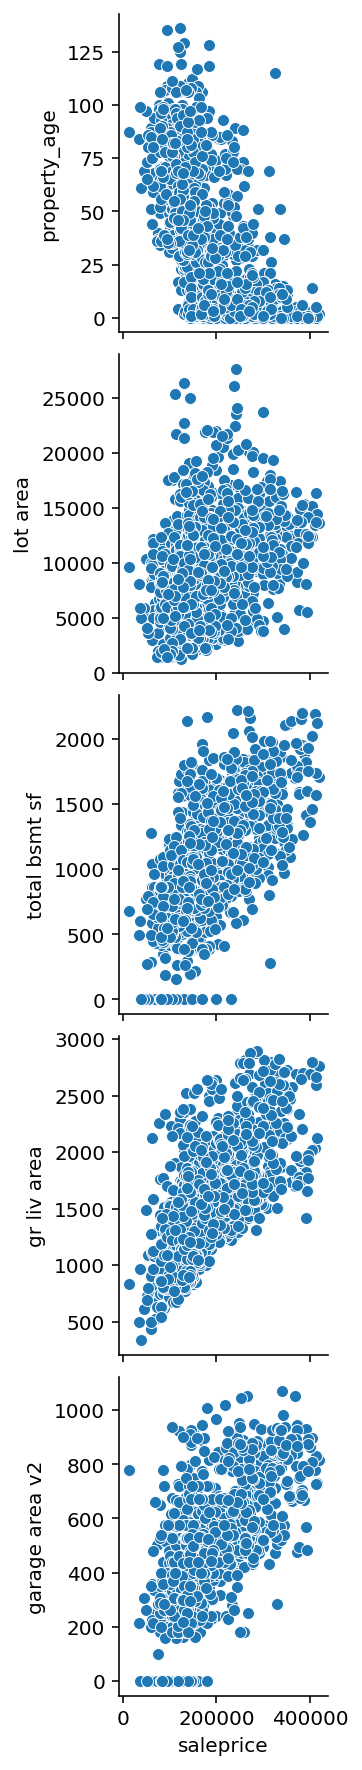

In [32]:
sns.pairplot(ames_df, y_vars=['property_age', 'lot area', 'total bsmt sf',
             'gr liv area', 'garage area v2'], x_vars=['saleprice'])

Scatterplots of continuous variables were plotted against outcome variables 'saleprice'. All of the variables seem to have positive correlation with the outcome variables, except for 'property_age' that shows an inverse correlation.

### Run Models

#### Model 1

In [33]:
#assign selected variables to X and y
features = ['property_age', 'lot area', 'gr liv area', 'garage area v2', 'total bsmt sf v2',
            'bedroom abvgr', 'kitchen abvgr', 'full bath', 'heat_quality',
           'central_air_scale_1', 'overall qual', 'overall cond', 'ms zoning_RH', 'ms zoning_FV', 
             'ms zoning_RM', 'transport1_0', 'neighborhood_NridgHt']
X = ames_df[features]
y = ames_df['saleprice']

In [34]:
#train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, train_size=0.7)

In [35]:
#scale variables
ss = StandardScaler()
ss.fit(X_train)
X_train_scale = ss.transform(X_train)
X_test_scale = ss.transform(X_test)

In [36]:
#instantiate models: linear
lr = LinearRegression()

#generate the cross_val score for LR fitted to train data
lr_scores = cross_val_score(lr, X_train_scale, y_train, cv=5)

In [37]:
#instantiate models: lasso (# Test out 200 different alpha values on 5-folds of data set and adopt the best performing alpha)
lasso = LassoCV(n_alphas=200)

#generate the cross_val score for Lasso CV (with optimal alpha value) fitted to train data
lasso_scores = cross_val_score(lasso, X_train_scale, y_train, cv=5)

In [38]:
#instantiate models: ridge
#Test out 200 different evenly spaced alpha values between 0.1 and 10 on default 5-folds of data set 
#and adopt the best performing alpha
ridge = RidgeCV(alphas=np.linspace(.1, 10, 200))

#generate cross_val score for Ridge CV (with optimal alpha value) fitted to train data
ridge_scores = cross_val_score(ridge, X_train_scale, y_train, cv=5)

In [39]:
#mean scores for each model based on train data: linear, lasso, ridge
print(f"Mean lr_score: {lr_scores.mean().round(5)}" )
print(f"Mean lasso_score: {lasso_scores.mean().round(5)}")
print(f"Mean ridge_score: {ridge_scores.mean().round(5)}")

Mean lr_score: 0.87078
Mean lasso_score: 0.87082
Mean ridge_score: 0.87082


In [40]:
#fit model to training data
lr.fit(X_train_scale, y_train)
lr.score(X_train_scale, y_train).round(5)

0.87467

In [41]:
#try model on test data
lr.score(X_test_scale, y_test).round(5)

0.85844

In [42]:
#regression model - to obtain the predicted y-values based on the lasso-trained model
lr_pred = lr.predict(X_test_scale)

In [43]:
# RMSE of the lr model
rmse_lr = np.sqrt(metrics.mean_squared_error(y_test, lr_pred))
rmse_lr

24302.702121786635

In [44]:
#fit model to training data
lasso.fit(X_train_scale, y_train)
lasso.score(X_train_scale, y_train).round(5)

0.87466

In [45]:
#alpha of lasso
lasso.alpha_.round(5)

54.36227

In [46]:
#try model on test data
lasso.score(X_test_scale, y_test).round(5)

0.85849

In [47]:
#regression model - to obtain the predicted y-values based on the lasso-trained model
lasso_pred = lasso.predict(X_test_scale)

In [48]:
# RMSE of the lasso model
rmse_lasso = np.sqrt(metrics.mean_squared_error(y_test, lasso_pred))
rmse_lasso

24298.018287620558

In [49]:
#fit model to training data
ridge.fit(X_train_scale, y_train)
ridge.score(X_train_scale, y_train).round(5)

0.87465

In [50]:
#alpha of ridge
ridge.alpha_.round(5)

8.30854

In [51]:
#try model on test data
ridge.score(X_test_scale, y_test).round(5)

0.85834

In [52]:
#regression model - to obtain the predicted y-values based on the lasso-trained model
ridge_pred = ridge.predict(X_test_scale)

In [53]:
# RMSE of the ridge model
rmse_ridge = np.sqrt(metrics.mean_squared_error(y_test, ridge_pred))
rmse_ridge

24311.093393744

|Model Type |R-sq (cross-val)| R-sq (train)|R-sq (test)| Difference (train - test)| RMSE (test)|No. of Features|
|:--|--|--|--|--|--|--|
|Linear|0.8708|0.8747|0.8584|0.0168|24302.07|17|
|Lasso|0.8708|0.8747|0.8585|0.0167|24298.02|17|
|Ridge|0.8708|0.8747|0.8583|0.0164|24311.09|17|

Based on the above evaluation metrics, Lasso regression had the best score for RMSE on train data. The R-sq for the train and test data are also performing marginally better than the other models. I will proceed with the lasso regression to obtain the coefficient of the 17 features.

<AxesSubplot:>

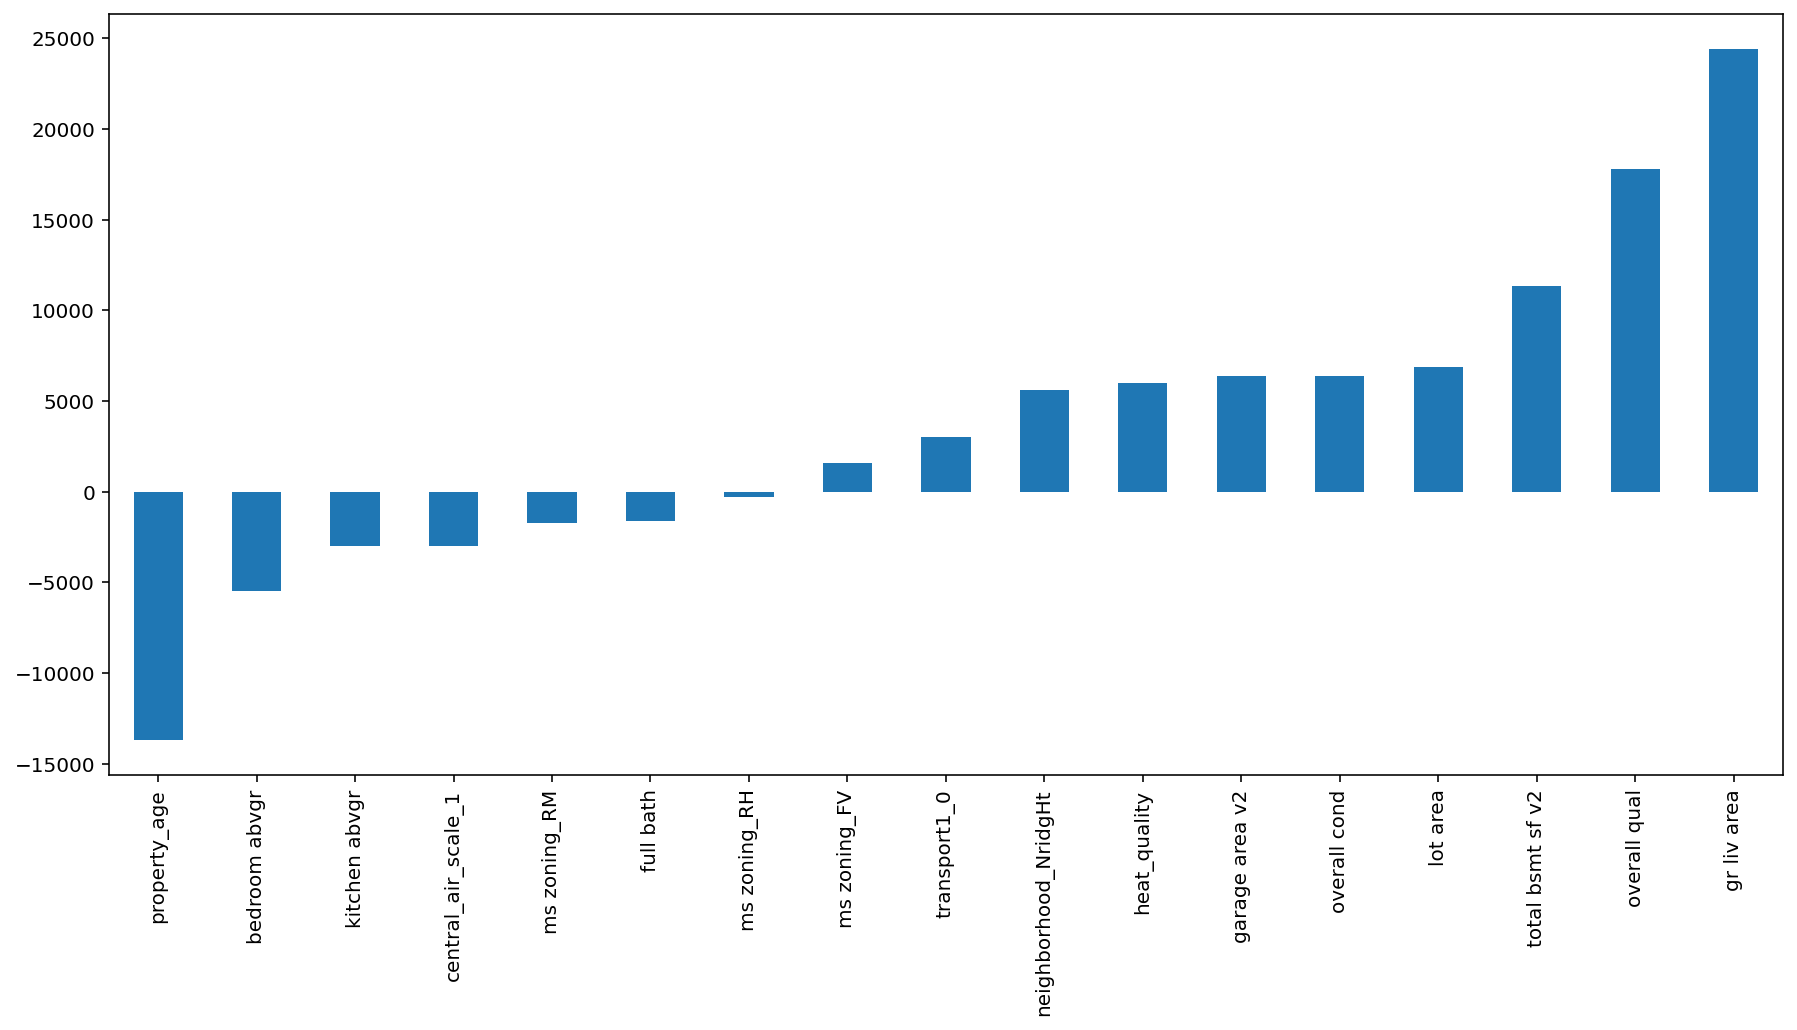

In [54]:
#coefficients of the lasso regression model
series = pd.Series(lasso.coef_, index=features)
series.sort_values(ascending=True).plot.bar(figsize=(15, 7))

In [55]:
#tabulate the coefficients for linear regression model
lasso_coefs = pd.DataFrame({'variable':X.columns,
                            'coef':lasso.coef_,
                            'abs_coef':np.abs(lasso.coef_)})

lasso_coefs.sort_values('abs_coef', inplace=True, ascending=False)

lasso_coefs

,variable,coef,abs_coef
2,gr liv area,24443.461744,24443.461744
10,overall qual,17771.745617,17771.745617
0,property_age,-13722.186740,13722.186740
4,total bsmt sf v2,11369.415821,11369.415821
1,lot area,6882.501691,6882.501691
11,overall cond,6374.672309,6374.672309
3,garage area v2,6365.796563,6365.796563
8,heat_quality,6006.341334,6006.341334
16,neighborhood_NridgHt,5579.612051,5579.612051
5,bedroom abvgr,-5496.708237,5496.708237


From the coefficient list above, it seems that variables from the 'ms zoning' and 'full bath' features are the smallest and the least impactful ones. As such, they will be dropped and we will re-evaluate the model before applying the selected model on the unseen test dataset.

#### Model 2 - Dropping of least impactful variables

Variables related to 'ms zoning' and 'full bath' will be dropped based on the low coefficient values obtained from the linear regression model.

|Selected Features |Type| Output| Description|
|:--|:--|:--|:--|
|gr liv area|Continuous|sqft|Total living area of the house|
|overall qual|Ordinal|1-10|Overall material and finish of the house. 1: Very Poor; 10: Very Excellent|
|property_age|Continuous|yrs|Derived by subtracting year built from year of sale|
|total bsmt sf v2|Continuous|sqft|Total area of basement area|
|heat_quality|Ordinal|1-10|Combined ratings of heating quality and fireplace quality. 1: Very Poor; 10: Very Excellent|
|lot area|Continuous|sqft|Lot size|
|overall cond|Ordinal|1-10|Overall condition of the house. 1: Very Poor; 10: Very Excellent|
|garage area v2|Continuous|sqft|Size of garage|
|bedroom abvgr|Discrete|Counts|Number of bedrooms above ground - does not include basement rooms|
|neighborhood_NridgHt|Nominal|1 or 0|Is the property located in NridgHt neighborhood?|
|central_air_scale_1|Nominal|1 or 0|Does the property has central air-conditioning?|
|transport1_0|Nominal|1 or 0|Is the property located near transportation routes (e.g. railway, main roads)?|
|kitchen abvgr|Discrete|Counts|Number of kitchens above ground|

In [56]:
#assign selected variables to X and y
features2 = ['property_age', 'lot area', 'gr liv area', 'garage area v2', 'total bsmt sf v2',
            'bedroom abvgr', 'kitchen abvgr', 'heat_quality',
           'central_air_scale_1', 'overall qual', 'overall cond', 
           'transport1_0', 'neighborhood_NridgHt']
X = ames_df[features2]
y = ames_df['saleprice']

In [57]:
#train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, train_size=0.7)

In [58]:
#scale variables
ss = StandardScaler()
ss.fit(X_train)
X_train_scale = ss.transform(X_train)
X_test_scale = ss.transform(X_test)

In [59]:
#instantiate models: linear
lr2 = LinearRegression()

#generate the cross_val score for LR fitted to train data
lr_scores = cross_val_score(lr2, X_train_scale, y_train, cv=5)

In [60]:
#instantiate models: lasso (# Test out 200 different alpha values on 5-folds of data set and adopt the best performing alpha)
lasso2 = LassoCV(n_alphas=200)

#generate the cross_val score for Lasso CV (with optimal alpha value) fitted to train data
lasso_scores = cross_val_score(lasso2, X_train_scale, y_train, cv=5)

In [61]:
#instantiate models: ridge
#Test out 200 different evenly spaced alpha values between 0.1 and 10 on default 5-folds of data set 
#and adopt the best performing alpha
ridge2 = RidgeCV(alphas=np.linspace(.1, 10, 200))

#generate cross_val score for Ridge CV (with optimal alpha value) fitted to train data
ridge_scores = cross_val_score(ridge2, X_train_scale, y_train, cv=5)

In [62]:
#mean scores for each model based on train data: linear, lasso, ridge
print(f"Mean lr_score: {lr_scores.mean().round(5)}" )
print(f"Mean lasso_score: {lasso_scores.mean().round(5)}")
print(f"Mean ridge_score: {ridge_scores.mean().round(5)}")

Mean lr_score: 0.86968
Mean lasso_score: 0.86969
Mean ridge_score: 0.86971


###### Running Model 2 on Training and Test Dataset

In [63]:
#fit lr model to training data
lr2.fit(X_train_scale, y_train)
lr2.score(X_train_scale, y_train).round(5)

0.87324

In [64]:
#try lr model on test data
lr2.score(X_test_scale, y_test).round(5)

0.85828

In [65]:
#regression model - to obtain the predicted y-values based on the lr-trained model
lr2_pred = lr2.predict(X_test_scale)

In [66]:
# RMSE of the lr model
rmse_lr = np.sqrt(metrics.mean_squared_error(y_test, lr2_pred))
rmse_lr

24316.423230735407

In [67]:
#fit lasso model to training data
lasso2.fit(X_train_scale, y_train)
lasso2.score(X_train_scale, y_train).round(5)

0.87323

In [68]:
#alpha of lasso
lasso2.alpha_.round(5)

54.36227

In [69]:
#try lasso model on test data
lasso2.score(X_test_scale, y_test).round(5)

0.8583

In [70]:
#regression model - to obtain the predicted y-values based on the lasso-trained model
lasso2_pred = lasso2.predict(X_test_scale)

In [71]:
# RMSE of the lasso model
rmse_lasso = np.sqrt(metrics.mean_squared_error(y_test, lasso2_pred))
rmse_lasso

24314.05499836179

In [72]:
#fit ridge model to training data
ridge2.fit(X_train_scale, y_train)
ridge2.score(X_train_scale, y_train).round(5)

0.87322

In [73]:
#alpha of ridge
ridge2.alpha_.round(5)

8.55729

In [74]:
#try ridge model on test data
ridge2.score(X_test_scale, y_test).round(5)

0.8582

In [75]:
#regression model - to obtain the predicted y-values based on the lasso-trained model
ridge2_pred = ridge2.predict(X_test_scale)

In [76]:
# RMSE of the ridge model
rmse_ridge = np.sqrt(metrics.mean_squared_error(y_test, ridge2_pred))
rmse_ridge

24323.27874122929

In [116]:
#Calculate Coefficient of Variation for all 3 models
mean_saleprice = ames_df['saleprice'].mean()
cov_lr = rmse_lr/mean_saleprice
cov_lasso = rmse_lasso/mean_saleprice
cov_ridge = rmse_ridge/mean_saleprice

In [121]:
#print the Coefficient of Variation for all 3 models
print(f"lr: {cov_lr.round(5)}; lasso: {cov_lasso.round(5)}; ridge: {cov_ridge.round(5)}")

lr: 0.13856; lasso: 0.13855; ridge: 0.1386


|Model Type |R-sq (cross-val)| R-sq (train)|R-sq (test)| Difference (train - test)| RMSE (test)|CV (test)|No. of Features|
|--|--|--|--|--|--|--|--|
|Linear|0.8697|0.8732|0.8583|0.0149|24316.42|0.139|13|
|Lasso|0.8697|0.8732|0.8583|0.0149|24314.05|0.139|13|
|Ridge|0.8697|0.8732|0.8582|0.0150|24323.28|0.139|13|

*Coefficient of Variation = CV*

Based on the results above, the Lasso model is the best performing one as it has the lowest RMSE(test) and marginally better R-sq values. Since the difference in R-sq values for the train and test data is less than 0.1, there is no evidence of overfitting. The three models low CV values (13.9%) - there is not much difference in the dispersion of datapoints around the mean for the three models. As such, we will select the Lasso model based on the low RMSE(test) value to generate the coefficient of the features, and also use it for the unseen test dataset (to be uploaded on Kaggle).

<AxesSubplot:>

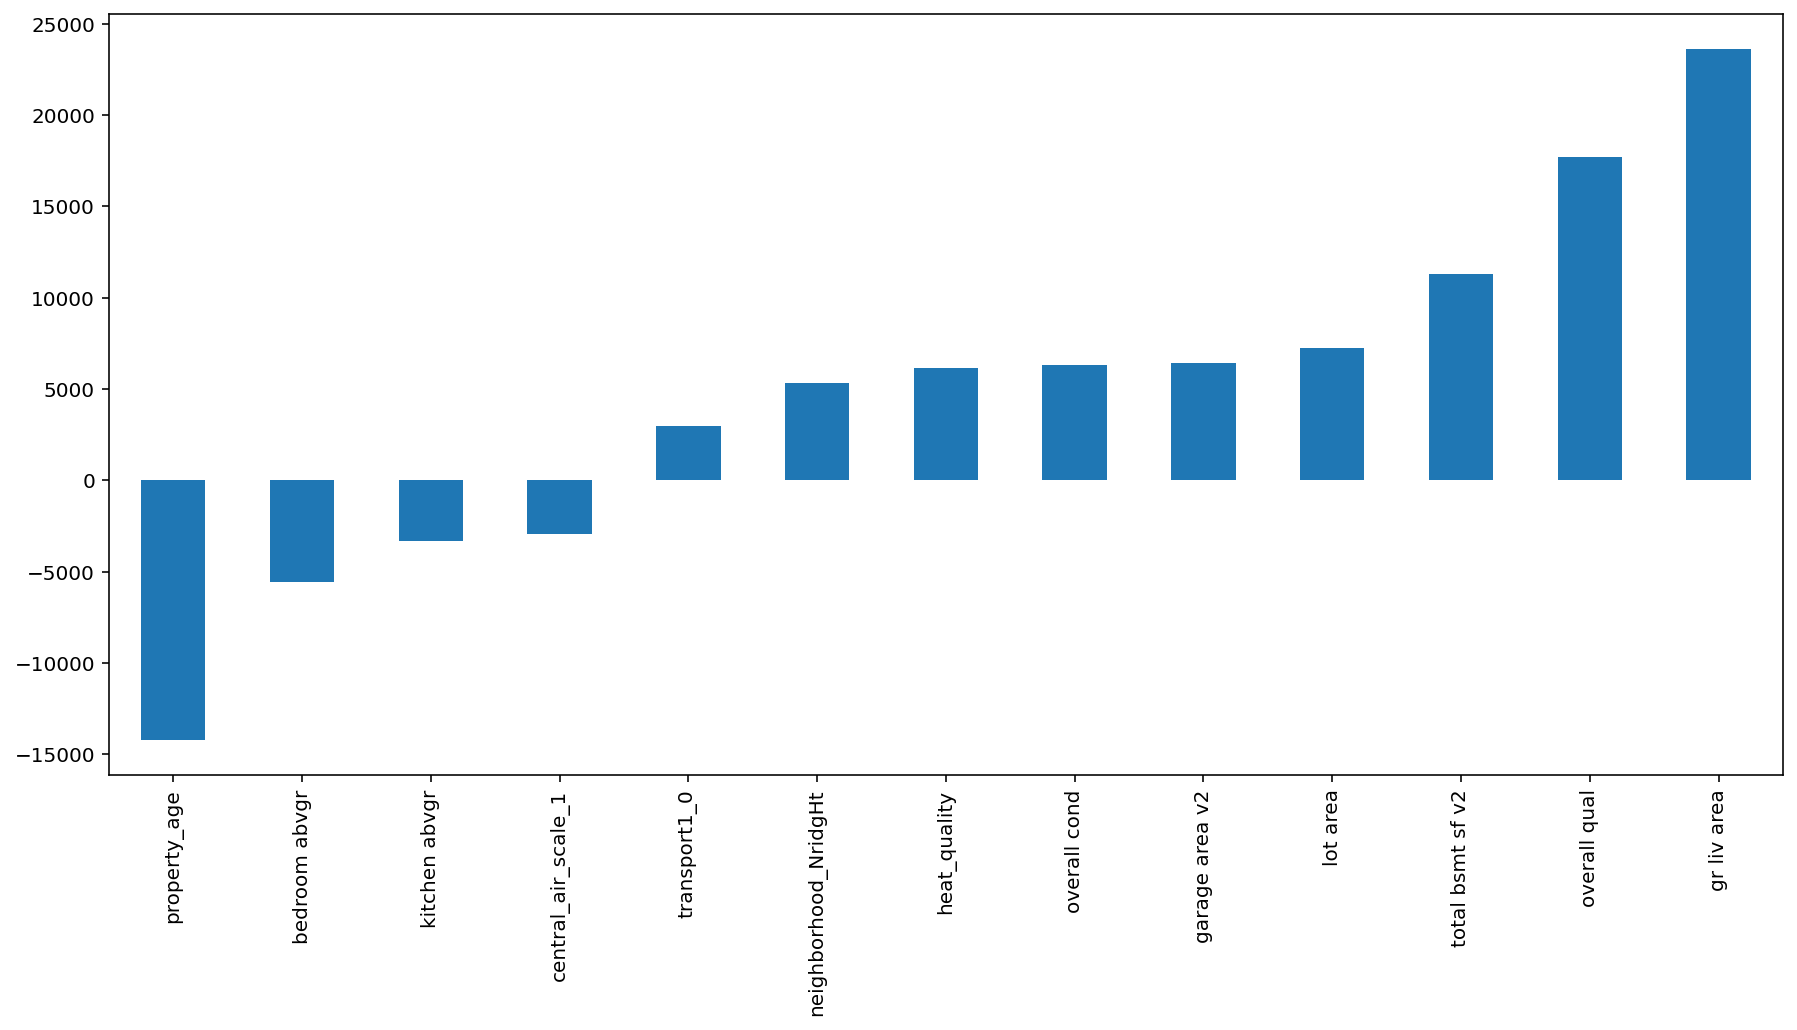

In [77]:
#coefficients of the regression model
series = pd.Series(lasso2.coef_, index=features2)
series.sort_values(ascending=True).plot.bar(figsize=(15, 7))

In [78]:
#tabulate the coefficients for model 2
lasso_coefs = pd.DataFrame({'variable':X.columns,
                            'coef':lasso2.coef_,
                            'abs_coef':np.abs(lasso2.coef_)})

lasso_coefs.sort_values('abs_coef', inplace=True, ascending=False)

lasso_coefs

,variable,coef,abs_coef
2,gr liv area,23639.397961,23639.397961
9,overall qual,17711.125522,17711.125522
0,property_age,-14234.348778,14234.348778
4,total bsmt sf v2,11310.440963,11310.440963
1,lot area,7236.293297,7236.293297
3,garage area v2,6420.606896,6420.606896
10,overall cond,6335.871532,6335.871532
7,heat_quality,6139.251324,6139.251324
5,bedroom abvgr,-5562.194094,5562.194094
12,neighborhood_NridgHt,5321.880120,5321.880120


Generally, the direction of the coefficients are aligned with how property prices are impacted. For instance, prices increase with increase floor area. This is demonstrated by the positive coefficient of 'gr liv area'. Prices generally falls if the property is older, hence the coefficient for 'property_age' is negative. The engineered 'heat_quality' also showed that there is positive impact on the property price for every level of increment in the heating quality.

There are some unique observations. For example, properties with central air-conditioning seem to have negative impact on prices. We would have thought that this would have helped increase the property price. This is likely due to the fact that Ames could have very cold winters and moderate summers, and buyers may consider heating as a more important feature than airconditioning.

Text(0, 0.5, 'Residuals')

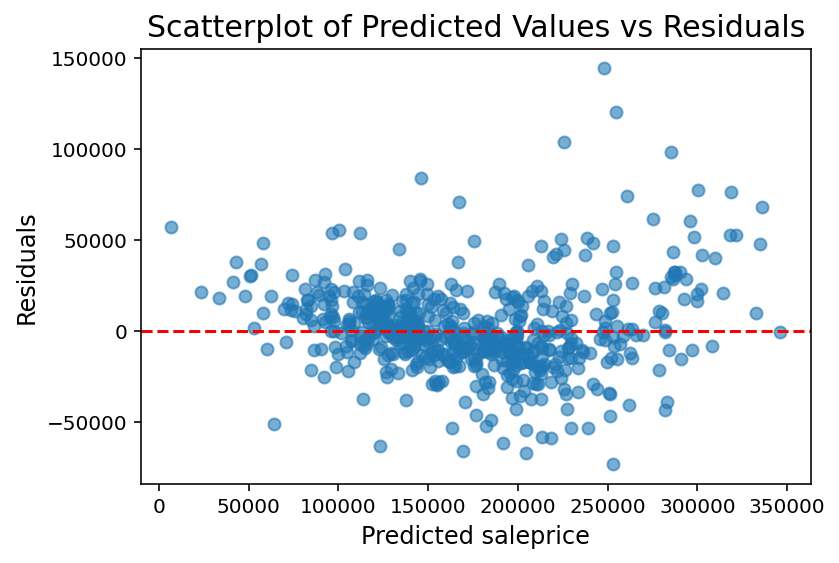

In [97]:
#y-value prediction vs residuals (y_test - pred) - target to have many data points clustering around the residuals=0 line.
residuals = y_test-lasso2_pred
plt.scatter(lasso2_pred, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='dashed')
plt.title('Scatterplot of Predicted Values vs Residuals', fontsize=15)
plt.xlabel('Predicted saleprice', fontsize=12)
plt.ylabel('Residuals', fontsize=12)

Text(0, 0.5, 'Predicted saleprice')

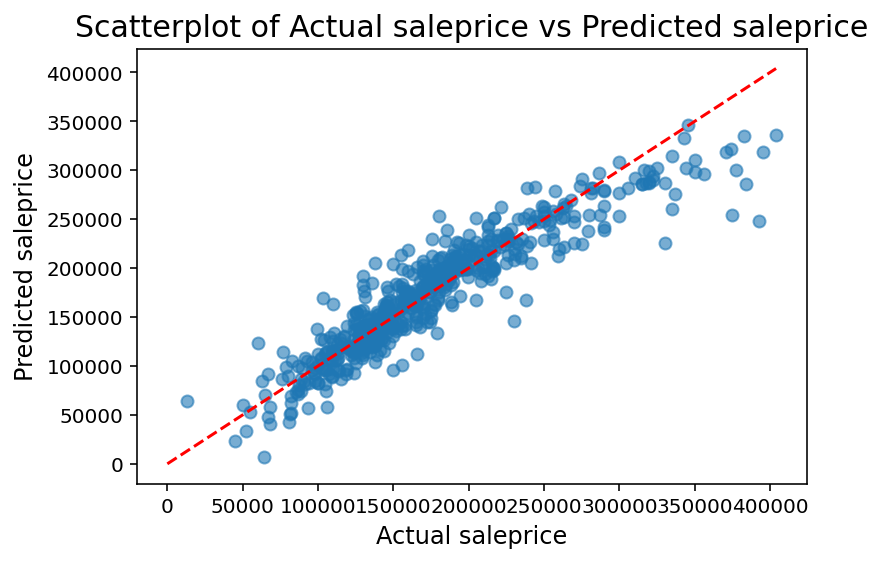

In [100]:
#actual vs predicted scatterplots for saleprice
plt.scatter(y_test, lasso2_pred, alpha=0.6)


# Line showing perfect predictions.
plt.plot([0, max(max(y_test),max(lasso2_pred))],
         [0, max(max(y_test),max(lasso2_pred))],
         linestyle = '--', c='r')
plt.title('Scatterplot of Actual saleprice vs Predicted saleprice', fontsize=15)
plt.xlabel('Actual saleprice', fontsize=12)
plt.ylabel('Predicted saleprice', fontsize=12)

Based on the scatterplot of predicted saleprice vs residuals, majority of the datapoints are clustered around the residuals=0 line (in red), with only a small minority of the datapoints locating away from the cluster. From the scatterplot of actual vs predicted saleprice, majority of the datapoints are clusted along the y=x line. These observations indicate that the observed datapoints are close to the model's predicted values. However, there is some underprediction of saleprice values for properties that were transacted at more than $374000 (3sd). Overall, we can say that the model is still performing decently in predicting the saleprice. 

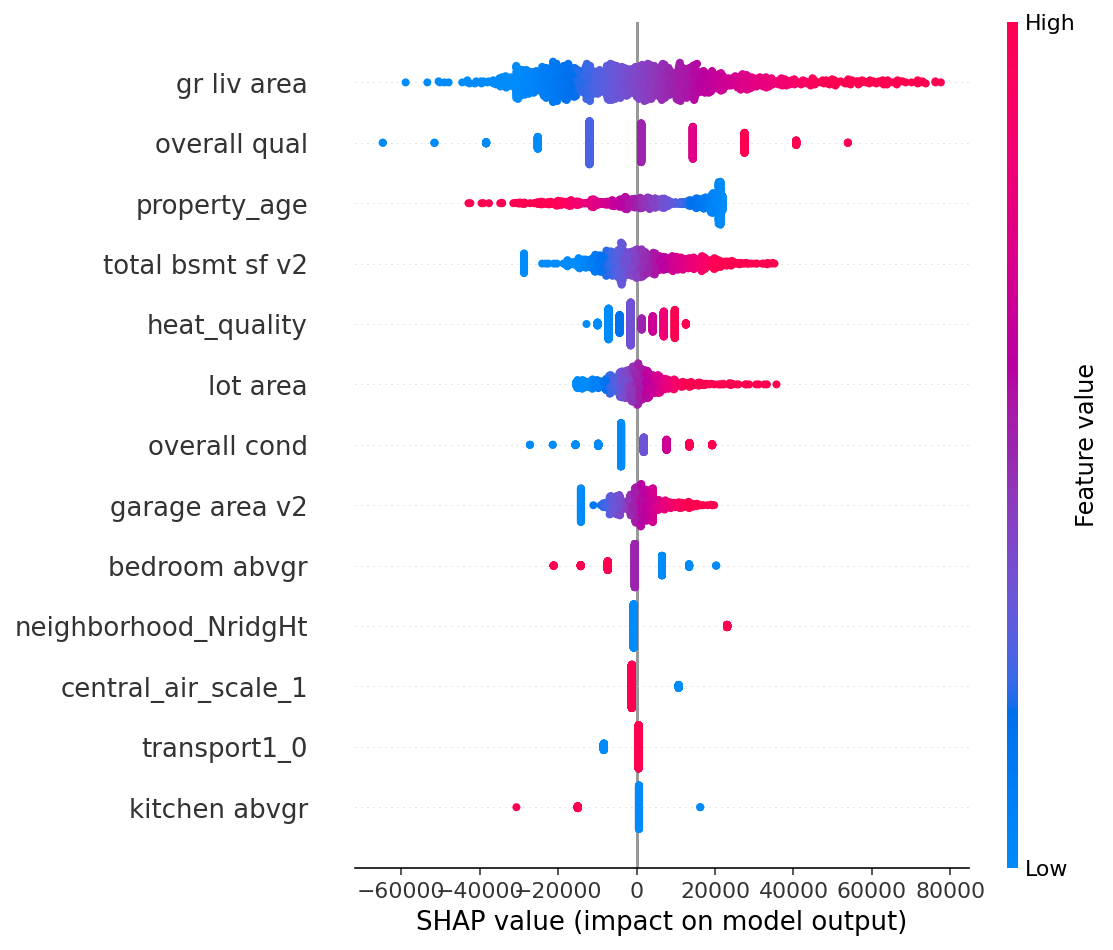

In [101]:
#to plot the SHAP values for all features using train data
explainer = shap.explainers.Linear(lasso2, X_train_scale)
lasso_shap_values = explainer(X_train_scale)

#to reinstate feature names removed by StandardScaler
for i,c in enumerate(X.columns):
    lasso_shap_values.feature_names[i] = c
    
shap.summary_plot(lasso_shap_values, X_train)

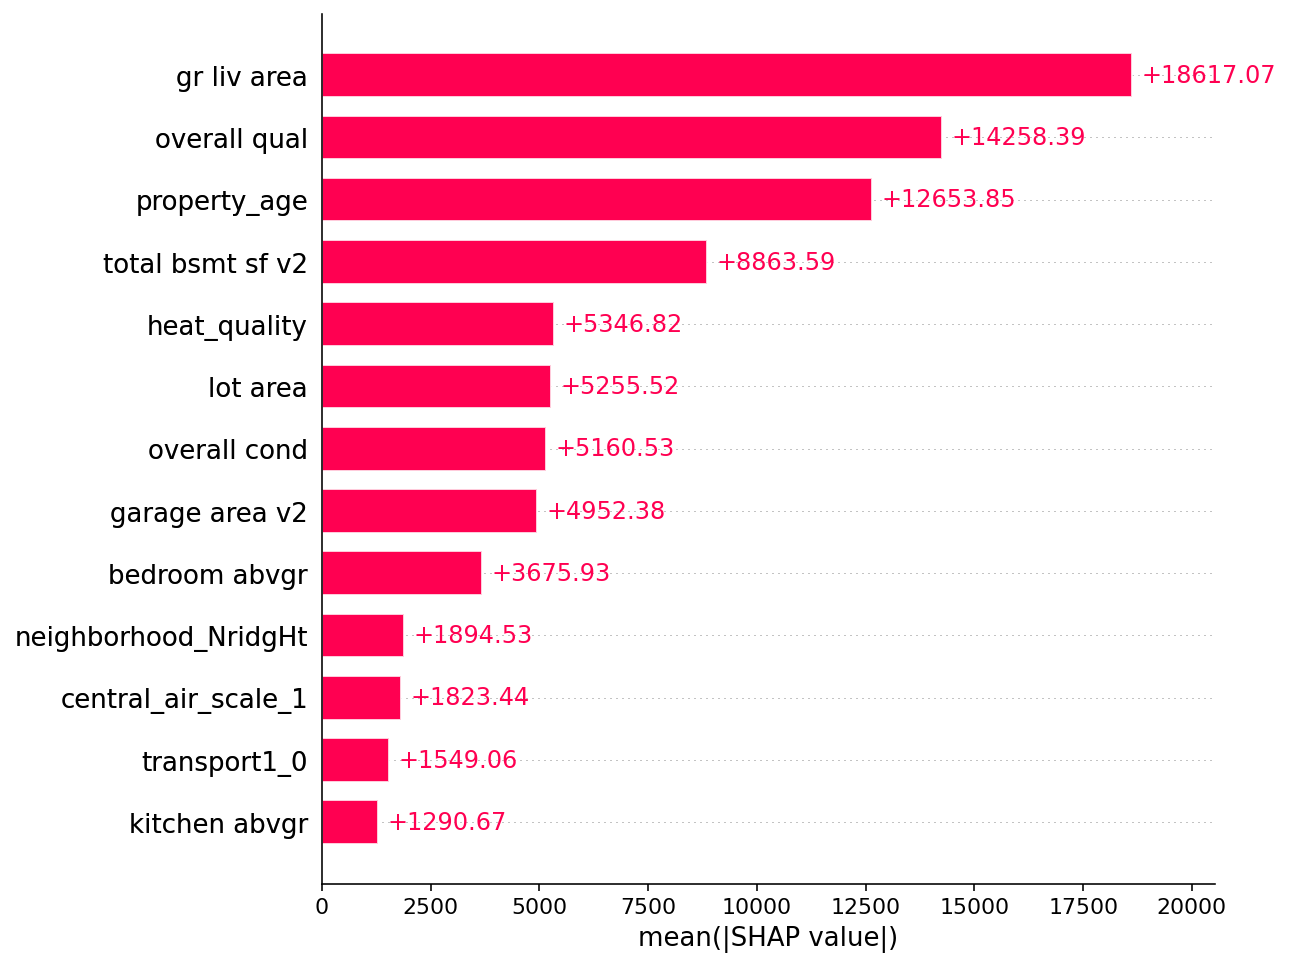

In [103]:
# Visualise variable importance for all 13 features
shap.plots.bar(lasso_shap_values, max_display=13)

From the SHAP plot, we can see that ground living area, overall quality and property age are the top 3 features that have high impact on the property prices. From the SHAP summary plot, high values for 'gr liv area' and 'overall qual' are associated with high positive values on target, whereas high 'property_age' values are associated negatively with target values. 

### To Run Model 2 on Unseen Test Data

In [104]:
#read cleaned test data file
test_data = pd.read_csv('./datasets/test_cleaned.csv')

In [105]:
#list of features
test_features = test_data[['property_age', 'lot area', 'gr liv area', 'garage area v2', 'total bsmt sf v2',
            'bedroom abvgr', 'kitchen abvgr', 'heat_quality',
           'central_air_scale_1', 'overall qual', 'overall cond', 
           'transport1_0','neighborhood_NridgHt']]

In [106]:
#to confirm that the required features are selected from the test data
test_features.columns

Index(['property_age', 'lot area', 'gr liv area', 'garage area v2',
       'total bsmt sf v2', 'bedroom abvgr', 'kitchen abvgr', 'heat_quality',
       'central_air_scale_1', 'overall qual', 'overall cond', 'transport1_0',
       'neighborhood_NridgHt'],
      dtype='object')

In [107]:
#to apply standard scaler transfromation to test data (test2)
X_test2_scale = ss.transform(test_features)

In [108]:
#regression model - to obtain the predicted y-values based on the 3 models
test_pred_lr2 = lr2.predict(X_test2_scale)
test_pred_lasso2 = lasso2.predict(X_test2_scale)
test_pred_ridge2 = ridge2.predict(X_test2_scale)

In [109]:
#create dataframe for each model
kaggle_lr = pd.DataFrame({'Id':test_data['id'], 'SalePrice': test_pred_lr2})
kaggle_lasso = pd.DataFrame({'Id':test_data['id'], 'SalePrice': test_pred_lasso2})
kaggle_ridge = pd.DataFrame({'Id':test_data['id'], 'SalePrice': test_pred_ridge2})

In [110]:
#save as csv files respectively
kaggle_lr.to_csv('./datasets/kaggle_lr.csv',index=False)
kaggle_lasso.to_csv('./datasets/kaggle_lasso.csv',index=False)
kaggle_ridge.to_csv('./datasets/kaggle_ridge.csv',index=False)

- RMSE (lr): 30366
- RMSE (lasso): 30334
- RMSE (ridge): 30393

As we have shown with training datasets, the lasso model works best at predicting the saleprice. The RMSE for lasso model was the lowest at $30334 when applied on unseen dataset.

### Recommendations and Conclusion

In summary, Model 2 (lasso) has demonstrated to be a good model with high R-sq value of at least 0.85 when run on train and test datasets. With the model, we have also managed to achieve a moderately low RMSE of $24000 and low CV value of 13.9%, indicating that the model could offer predictions that are close to the actual values. The top 3 features that are strong predictors of the sale price are ground living area, overall quality of the property, and the age of the property.

With the completion of the property price prediction model for Ames, we would like to suggest the following recommendations:

1. To launch the property price estimator on our property listing websites for clients who are buying/selling properties in Ames, Iowa. 
    - With access to this estimator, our clients will be able to make data-driven decisions on the best price for their property purchase, or to maximise profit for the property that they are intending to sell.
    - This will reassure clients that they will be getting the best out of their property sale or purchase, so that they will put their trust in us to broker their property sale or purchase.
2. Our agents should assess/evaluate their clients' property based on the features selected in the model. Sale price should also be recorded. 
    - Information of the features can be fed into the model so that the estimated sale price can be derived.
    - At the same time, ongoing information gathering allows collection of more updated data that can be used to train the model periodically to ensure its relevance.
3. Replicate the model with data collection from other cities in Iowa and other states to increase outreach and market share.
    - As a mid-term plan, the data collection process allows us to start building the database so that we can build specific models for each city/state within the next 1-2 years, before expanding the reach to more clients outside of Ames.

